# ECON 5140 - Homework 2
## Regression/ETS Models & ARIMA Models

**Name:** [Your Name]  
**Date:** February 11, 2026


## Part 1: Analytical Problems

### Problem 1: Simple Exponential Smoothing

In [1]:
import numpy as np
import pandas as pd

# Problem 1 - SES calculations
print("Problem 1: Simple Exponential Smoothing\n")

# Given values
l_9 = 250
y_10 = 280
alpha = 0.3

# a) Calculate updated level
l_10 = alpha * y_10 + (1 - alpha) * l_9
print(f"a) Updated level estimate:")
print(f"   l_10 = {alpha} * {y_10} + {1-alpha} * {l_9}")
print(f"   l_10 = {l_10:.2f} cups\n")

# b) Forecast error
error = y_10 - l_9
print(f"b) One-step-ahead forecast error:")
print(f"   e_10 = {y_10} - {l_9} = {error:.2f} cups\n")

# c) Forecast for day 11
print(f"c) Forecast for day 11:")
print(f"   y_11|10 = l_10 = {l_10:.2f} cups\n")

# d) Error correction form
print(f"d) Error correction model verification:")
print(f"   l_t = l_t-1 + alpha*(y_t - l_t-1)")
l_10_check = l_9 + alpha * error
print(f"   l_10 = {l_9} + {alpha} * {error}")
print(f"   l_10 = {l_10_check:.2f} cups (verified!)\n")

# e) With higher alpha
alpha_new = 0.7
l_10_new = alpha_new * y_10 + (1 - alpha_new) * l_9
print(f"e) If alpha = {alpha_new}:")
print(f"   l_10 = {l_10_new:.2f} cups")
print(f"   This is higher than before because higher alpha puts more weight")
print(f"   on recent observations. Since y_10 > l_9, we get a higher estimate.")

Problem 1: Simple Exponential Smoothing

a) Updated level estimate:
   l_10 = 0.3 * 280 + 0.7 * 250
   l_10 = 259.00 cups

b) One-step-ahead forecast error:
   e_10 = 280 - 250 = 30.00 cups

c) Forecast for day 11:
   y_11|10 = l_10 = 259.00 cups

d) Error correction model verification:
   l_t = l_t-1 + alpha*(y_t - l_t-1)
   l_10 = 250 + 0.3 * 30
   l_10 = 259.00 cups (verified!)

e) If alpha = 0.7:
   l_10 = 271.00 cups
   This is higher than before because higher alpha puts more weight
   on recent observations. Since y_10 > l_9, we get a higher estimate.


### Problem 2: Holt's Linear Trend Method

In [2]:
print("\nProblem 2: Holt's Method\n")

# Given data
l_5 = 10000
b_5 = 500
y_6 = 11200
alpha = 0.4
beta = 0.2

# a) Update level
l_6 = alpha * y_6 + (1 - alpha) * (l_5 + b_5)
print(f"a) Updated level:")
print(f"   l_6 = {alpha} * {y_6} + {1-alpha} * ({l_5} + {b_5})")
print(f"   l_6 = {l_6:.2f} subscribers\n")

# b) Update trend
b_6 = beta * (l_6 - l_5) + (1 - beta) * b_5
print(f"b) Updated trend:")
print(f"   b_6 = {beta} * ({l_6:.2f} - {l_5}) + {1-beta} * {b_5}")
print(f"   b_6 = {b_6:.2f} subscribers/month\n")

# c) Forecasts
y_7 = l_6 + b_6
y_8 = l_6 + 2 * b_6
print(f"c) Forecasts:")
print(f"   y_7|6 = {l_6:.2f} + {b_6:.2f} = {y_7:.2f} subscribers")
print(f"   y_8|6 = {l_6:.2f} + 2*{b_6:.2f} = {y_8:.2f} subscribers")


Problem 2: Holt's Method

a) Updated level:
   l_6 = 0.4 * 11200 + 0.6 * (10000 + 500)
   l_6 = 10780.00 subscribers

b) Updated trend:
   b_6 = 0.2 * (10780.00 - 10000) + 0.8 * 500
   b_6 = 556.00 subscribers/month

c) Forecasts:
   y_7|6 = 10780.00 + 556.00 = 11336.00 subscribers
   y_8|6 = 10780.00 + 2*556.00 = 11892.00 subscribers


### Problem 3: Forecast Evaluation Metrics

In [3]:
print("\nProblem 3: Forecast Metrics\n")

actual = np.array([100, 110, 105, 115, 120])
forecast = np.array([95, 108, 112, 110, 125])
errors = actual - forecast

print("Data:")
for i in range(len(actual)):
    print(f"  Period {i+1}: Actual={actual[i]}, Forecast={forecast[i]}, Error={errors[i]}")

# a) MAE
mae = np.mean(np.abs(errors))
print(f"\na) MAE = (1/5) * sum(|errors|)")
print(f"   MAE = (1/5) * ({' + '.join(map(str, np.abs(errors)))})")
print(f"   MAE = {mae:.2f}")

# b) MSE
mse = np.mean(errors**2)
print(f"\nb) MSE = (1/5) * sum(errors^2)")
print(f"   MSE = (1/5) * ({' + '.join(map(str, errors**2))})")
print(f"   MSE = {mse:.2f}")

# c) RMSE
rmse = np.sqrt(mse)
print(f"\nc) RMSE = sqrt(MSE) = sqrt({mse:.2f}) = {rmse:.4f}")

# d) MAPE
mape = np.mean(np.abs(errors / actual)) * 100
print(f"\nd) MAPE = (1/5) * sum(|errors/actual|) * 100%")
print(f"   MAPE = {mape:.2f}%")

# e) Analysis
print(f"\ne) The error of -7 in period 3 is most problematic for RMSE.")
print(f"   RMSE penalizes it more because it squares the errors.")
print(f"   In MAE: |-7| = 7 contributes linearly")
print(f"   In MSE: (-7)^2 = 49 contributes {49/np.sum(errors**2)*100:.1f}% of total squared errors")
print(f"   So large errors have exponentially more impact on RMSE.")


Problem 3: Forecast Metrics

Data:
  Period 1: Actual=100, Forecast=95, Error=5
  Period 2: Actual=110, Forecast=108, Error=2
  Period 3: Actual=105, Forecast=112, Error=-7
  Period 4: Actual=115, Forecast=110, Error=5
  Period 5: Actual=120, Forecast=125, Error=-5

a) MAE = (1/5) * sum(|errors|)
   MAE = (1/5) * (5 + 2 + 7 + 5 + 5)
   MAE = 4.80

b) MSE = (1/5) * sum(errors^2)
   MSE = (1/5) * (25 + 4 + 49 + 25 + 25)
   MSE = 25.60

c) RMSE = sqrt(MSE) = sqrt(25.60) = 5.0596

d) MAPE = (1/5) * sum(|errors/actual|) * 100%
   MAPE = 4.40%

e) The error of -7 in period 3 is most problematic for RMSE.
   RMSE penalizes it more because it squares the errors.
   In MAE: |-7| = 7 contributes linearly
   In MSE: (-7)^2 = 49 contributes 38.3% of total squared errors
   So large errors have exponentially more impact on RMSE.


### Problem 4: MA(1) Model

In [4]:
print("\nProblem 4: MA(1) Model\n")

theta = 0.6
epsilon_10 = 2
epsilon_9 = -1

print(f"Given: y_t = epsilon_t + theta*epsilon_t-1, theta = {theta}\n")

# a) Calculate y_10
y_10 = epsilon_10 + theta * epsilon_9
print(f"a) y_10 = {epsilon_10} + {theta}*({epsilon_9}) = {y_10}")

# b) One-step forecast
y_11_forecast = theta * epsilon_10
print(f"\nb) y_11|10 = E[epsilon_11] + theta*epsilon_10")
print(f"   Since E[epsilon_11] = 0:")
print(f"   y_11|10 = 0 + {theta}*{epsilon_10} = {y_11_forecast}")

# c) Two-step forecast
print(f"\nc) y_12|10 = E[epsilon_12] + theta*E[epsilon_11]")
print(f"   Both expectations are 0, so:")
print(f"   y_12|10 = 0")

# d) Explanation
print(f"\nd) MA(1) forecasts return to zero after 1 step because:")
print(f"   - MA(1) only has memory of 1 lag")
print(f"   - y_t depends only on epsilon_t and epsilon_t-1")
print(f"   - For h>=2, all relevant shocks are unknown with E=0")
print(f"   - So forecasts revert to the series mean (zero here)")

# e) Lag-1 autocorrelation
rho_1 = theta / (1 + theta**2)
print(f"\ne) rho(1) = theta/(1 + theta^2)")
print(f"   rho(1) = {theta}/(1 + {theta**2})")
print(f"   rho(1) = {rho_1:.4f}")
print(f"   Note: For MA(1), rho(k) = 0 for all k >= 2")


Problem 4: MA(1) Model

Given: y_t = epsilon_t + theta*epsilon_t-1, theta = 0.6

a) y_10 = 2 + 0.6*(-1) = 1.4

b) y_11|10 = E[epsilon_11] + theta*epsilon_10
   Since E[epsilon_11] = 0:
   y_11|10 = 0 + 0.6*2 = 1.2

c) y_12|10 = E[epsilon_12] + theta*E[epsilon_11]
   Both expectations are 0, so:
   y_12|10 = 0

d) MA(1) forecasts return to zero after 1 step because:
   - MA(1) only has memory of 1 lag
   - y_t depends only on epsilon_t and epsilon_t-1
   - For h>=2, all relevant shocks are unknown with E=0
   - So forecasts revert to the series mean (zero here)

e) rho(1) = theta/(1 + theta^2)
   rho(1) = 0.6/(1 + 0.36)
   rho(1) = 0.4412
   Note: For MA(1), rho(k) = 0 for all k >= 2


---
## Part 3: Coding Problems

### Setup and Data Generation

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Generate Dataset 1: Monthly Retail Sales
print("Dataset 1: Monthly Retail Sales\n" + "="*50)

dates = pd.date_range('2021-01-01', '2024-12-31', freq='MS')
n_months = len(dates)
t = np.arange(n_months)

# Generate components
trend = 1000 + 15*t
seasonal = 300 * np.sin(2*np.pi*t/12) + 200 * np.cos(2*np.pi*t/12)

# Holiday effects (Nov-Dec)
holiday = np.zeros(n_months)
for year in range(4):
    nov_idx = year*12 + 10
    dec_idx = year*12 + 11
    if nov_idx < n_months:
        holiday[nov_idx] = 400
    if dec_idx < n_months:
        holiday[dec_idx] = 600

noise = np.random.normal(0, 80, n_months)
sales = trend + seasonal + holiday + noise
sales = np.maximum(sales, 0)

df_sales = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'Month': dates.month,
    'Year': dates.year,
    'Time': t
})
df_sales.set_index('Date', inplace=True)

print(f"Date range: {df_sales.index[0].date()} to {df_sales.index[-1].date()}")
print(f"Number of observations: {len(df_sales)}\n")
print(df_sales['Sales'].describe())

Dataset 1: Monthly Retail Sales
Date range: 2021-01-01 to 2024-12-01
Number of observations: 48

count      48.000000
mean     1419.409544
std       352.878551
min       722.634428
25%      1196.284168
50%      1393.908200
75%      1710.667034
max      2412.774859
Name: Sales, dtype: float64


### A1: Exploratory Visualization


A1: Exploratory Plots



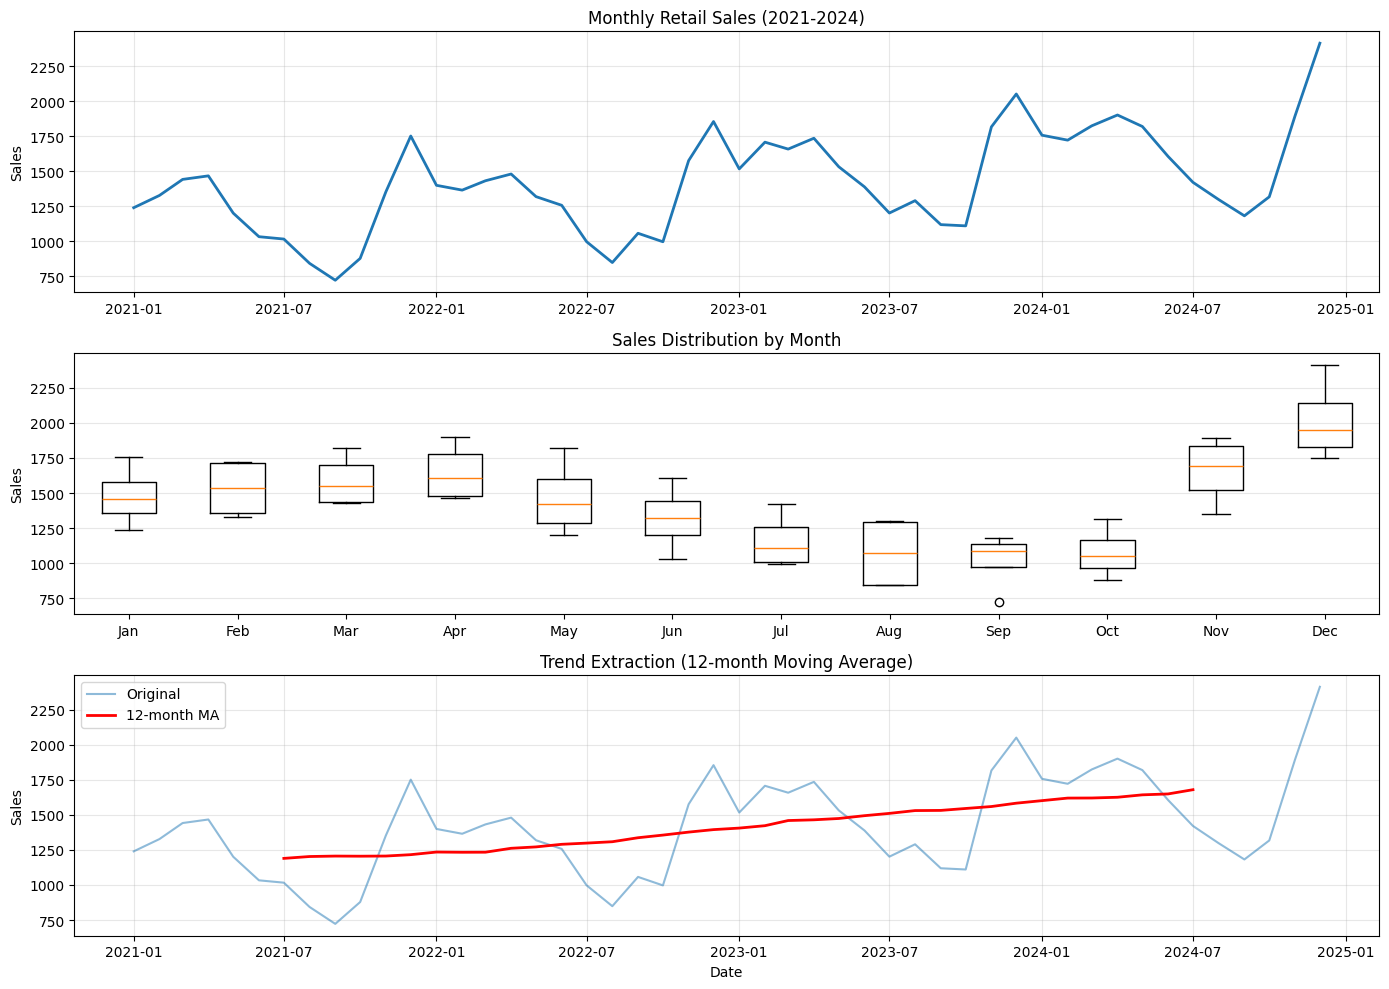

Observations:
- Clear upward trend visible in the data
- Strong seasonal pattern with peaks in Nov/Dec (holiday season)
- Highest average sales: Month 12 (2017.12)
- Lowest average sales: Month 9 (1020.28)


In [6]:
print("\nA1: Exploratory Plots\n")

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Time series
axes[0].plot(df_sales.index, df_sales['Sales'], linewidth=2)
axes[0].set_title('Monthly Retail Sales (2021-2024)')
axes[0].set_ylabel('Sales')
axes[0].grid(True, alpha=0.3)

# Plot 2: Seasonal boxplot
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
box_data = [df_sales[df_sales.index.month == i]['Sales'].values for i in range(1, 13)]
axes[1].boxplot(box_data, labels=month_names)
axes[1].set_title('Sales Distribution by Month')
axes[1].set_ylabel('Sales')
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Trend extraction with moving average
ma_12 = df_sales['Sales'].rolling(window=12, center=True).mean()
axes[2].plot(df_sales.index, df_sales['Sales'], alpha=0.5, label='Original')
axes[2].plot(df_sales.index, ma_12, linewidth=2, color='red', label='12-month MA')
axes[2].set_title('Trend Extraction (12-month Moving Average)')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('A1_exploratory.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary observations
print("Observations:")
print("- Clear upward trend visible in the data")
print("- Strong seasonal pattern with peaks in Nov/Dec (holiday season)")
monthly_avg = df_sales.groupby('Month')['Sales'].mean().sort_values(ascending=False)
print(f"- Highest average sales: Month {monthly_avg.index[0]} ({monthly_avg.iloc[0]:.2f})")
print(f"- Lowest average sales: Month {monthly_avg.index[-1]} ({monthly_avg.iloc[-1]:.2f})")

### A2: Regression with Trend and Seasonality


A2: Regression Model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     83.27
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           4.66e-22
Time:                        20:02:03   Log-Likelihood:                -267.91
No. Observations:                  48   AIC:                             561.8
Df Residuals:                      35   BIC:                             586.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1225.9156     40.

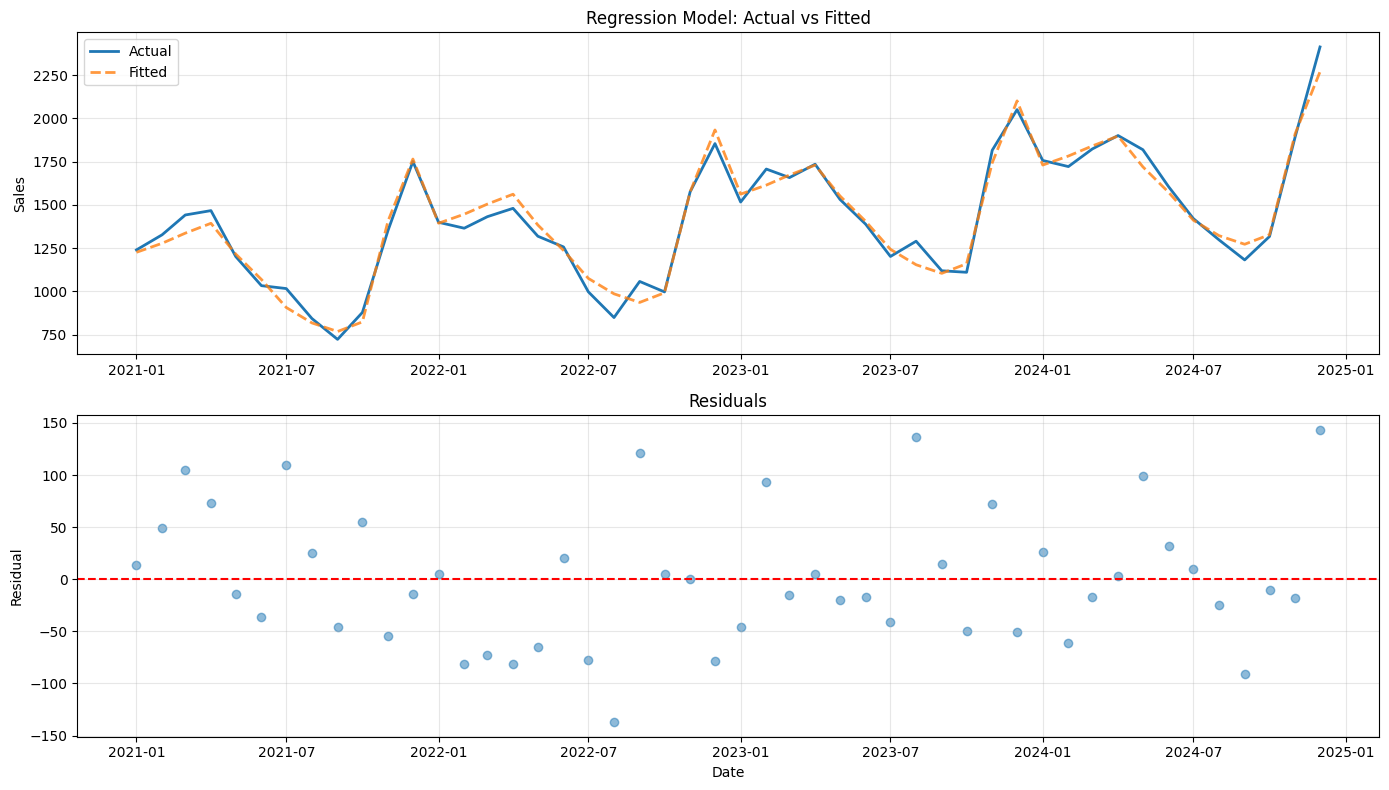

In [7]:
print("\nA2: Regression Model\n")

# Create month dummies (drop first month as baseline)
month_dummies = pd.get_dummies(df_sales['Month'], prefix='M', drop_first=True, dtype=float)
df_reg = pd.concat([df_sales[['Sales', 'Time']], month_dummies], axis=1)

# Fit OLS regression
X = df_reg.drop('Sales', axis=1).astype(float)
X = sm.add_constant(X)
y = df_reg['Sales'].astype(float)

model_reg = sm.OLS(y, X).fit()
print(model_reg.summary())

# Interpretation
print("\n" + "="*60)
print("Model Interpretation:")
print("="*60)
trend_coef = model_reg.params['Time']
print(f"\nMonthly trend coefficient: {trend_coef:.4f}")
print(f"-> Sales increase by about {trend_coef:.2f} units per month on average")

seasonal_coefs = model_reg.params[[col for col in model_reg.params.index if 'M_' in col]]
max_month = int(seasonal_coefs.idxmax().split('_')[1])
print(f"\nLargest seasonal effect: Month {max_month} (coef = {seasonal_coefs.max():.2f})")
print(f"-> Month {max_month} has {seasonal_coefs.max():.2f} higher sales vs January (baseline)")

# Model fit statistics
fitted = model_reg.fittedvalues
resid = model_reg.resid
r2 = model_reg.rsquared
rmse = np.sqrt(np.mean(resid**2))
mae = np.mean(np.abs(resid))

print(f"\nModel Fit:")
print(f"  R-squared: {r2:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")

# Plot actual vs fitted
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(df_sales.index, df_sales['Sales'], label='Actual', linewidth=2)
axes[0].plot(df_sales.index, fitted, label='Fitted', linewidth=2, linestyle='--', alpha=0.8)
axes[0].set_title('Regression Model: Actual vs Fitted')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df_sales.index, resid, alpha=0.5)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Residuals')
axes[1].set_ylabel('Residual')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('A2_regression.png', dpi=300, bbox_inches='tight')
plt.show()

### A3: Fourier Terms for Seasonality


A3: Fourier Seasonality

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     52.94
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           4.72e-17
Time:                        20:02:04   Log-Likelihood:                -301.46
No. Observations:                  48   AIC:                             614.9
Df Residuals:                      42   BIC:                             626.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1070.5202     

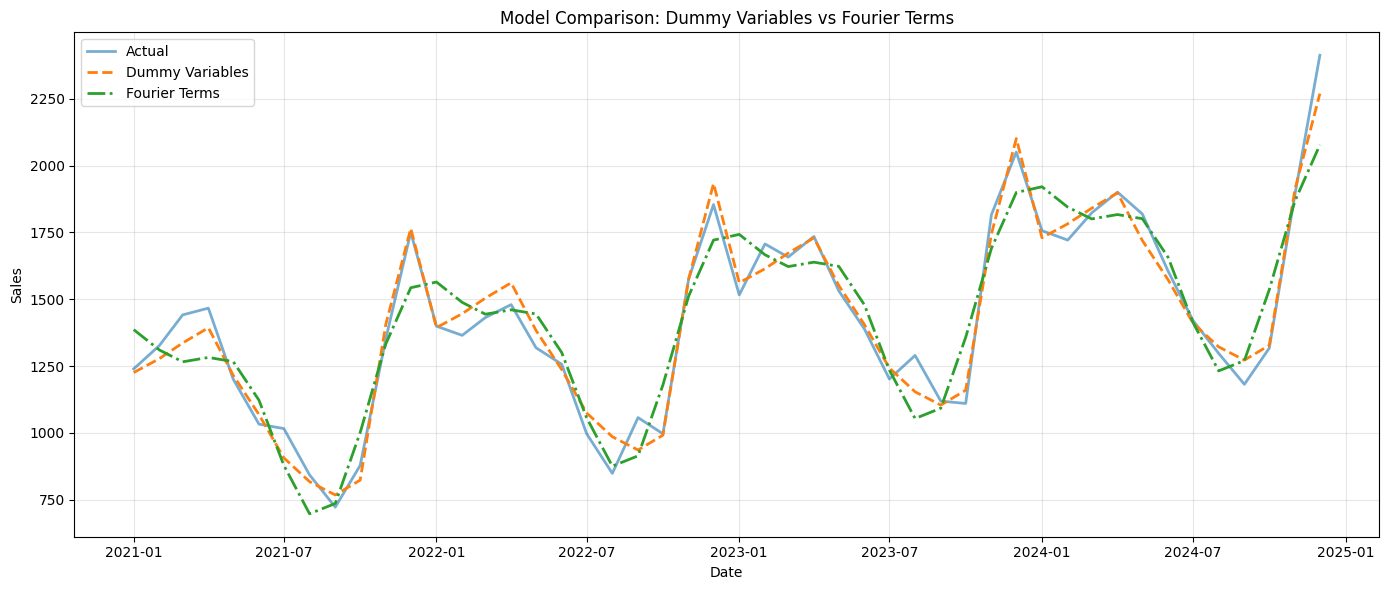


Conclusion:
Dummy variable model has lower AIC, but uses more parameters.
Fourier uses 6 parameters vs 13 for dummies.
Fourier approach is more parsimonious for smooth seasonal patterns.


In [8]:
print("\nA3: Fourier Seasonality\n")

# Create Fourier terms (k=1,2)
df_fourier = df_sales[['Sales', 'Time']].copy()
for k in [1, 2]:
    df_fourier[f'sin{k}'] = np.sin(2 * np.pi * k * df_sales['Time'] / 12)
    df_fourier[f'cos{k}'] = np.cos(2 * np.pi * k * df_sales['Time'] / 12)

# Fit Fourier regression
X_four = df_fourier.drop('Sales', axis=1).astype(float)
X_four = sm.add_constant(X_four)
model_four = sm.OLS(df_fourier['Sales'].astype(float), X_four).fit()

print(model_four.summary())

# Compare models
print("\n" + "="*60)
print("Model Comparison")
print("="*60)
comp_df = pd.DataFrame({
    'Metric': ['R-squared', 'Adj R-squared', 'AIC', 'BIC', 'Num Parameters'],
    'Dummy Variables': [
        f"{model_reg.rsquared:.4f}",
        f"{model_reg.rsquared_adj:.4f}",
        f"{model_reg.aic:.2f}",
        f"{model_reg.bic:.2f}",
        len(model_reg.params)
    ],
    'Fourier Terms': [
        f"{model_four.rsquared:.4f}",
        f"{model_four.rsquared_adj:.4f}",
        f"{model_four.aic:.2f}",
        f"{model_four.bic:.2f}",
        len(model_four.params)
    ]
})
print(comp_df.to_string(index=False))

# Plot comparison
fitted_four = model_four.fittedvalues
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_sales.index, df_sales['Sales'], label='Actual', linewidth=2, alpha=0.6)
ax.plot(df_sales.index, fitted, label='Dummy Variables', linewidth=2, linestyle='--')
ax.plot(df_sales.index, fitted_four, label='Fourier Terms', linewidth=2, linestyle='-.')
ax.set_title('Model Comparison: Dummy Variables vs Fourier Terms')
ax.set_ylabel('Sales')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('A3_fourier.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConclusion:")
if model_four.aic < model_reg.aic:
    print("Fourier model has lower AIC, indicating better fit with fewer parameters.")
else:
    print("Dummy variable model has lower AIC, but uses more parameters.")
print(f"Fourier uses {len(model_four.params)} parameters vs {len(model_reg.params)} for dummies.")
print("Fourier approach is more parsimonious for smooth seasonal patterns.")

### A4: Simple Exponential Smoothing


A4: Simple Exponential Smoothing

Seasonal indices (deviation from mean):
  Month 1: +52.38
  Month 2: +133.65
  Month 3: +177.58
  Month 4: +227.83
  Month 5: +17.73
  Month 6: -106.65
  Month 7: -260.95
  Month 8: -338.81
  Month 9: -366.41
  Month 10: -337.56
  Month 11: +248.77
  Month 12: +552.43

Optimized alpha: 0.4112
Medium alpha -> balanced between stability and responsiveness

Forecast Accuracy (holdout period):
  MAE:  167.26
  RMSE: 186.05
  MAPE: 9.70%


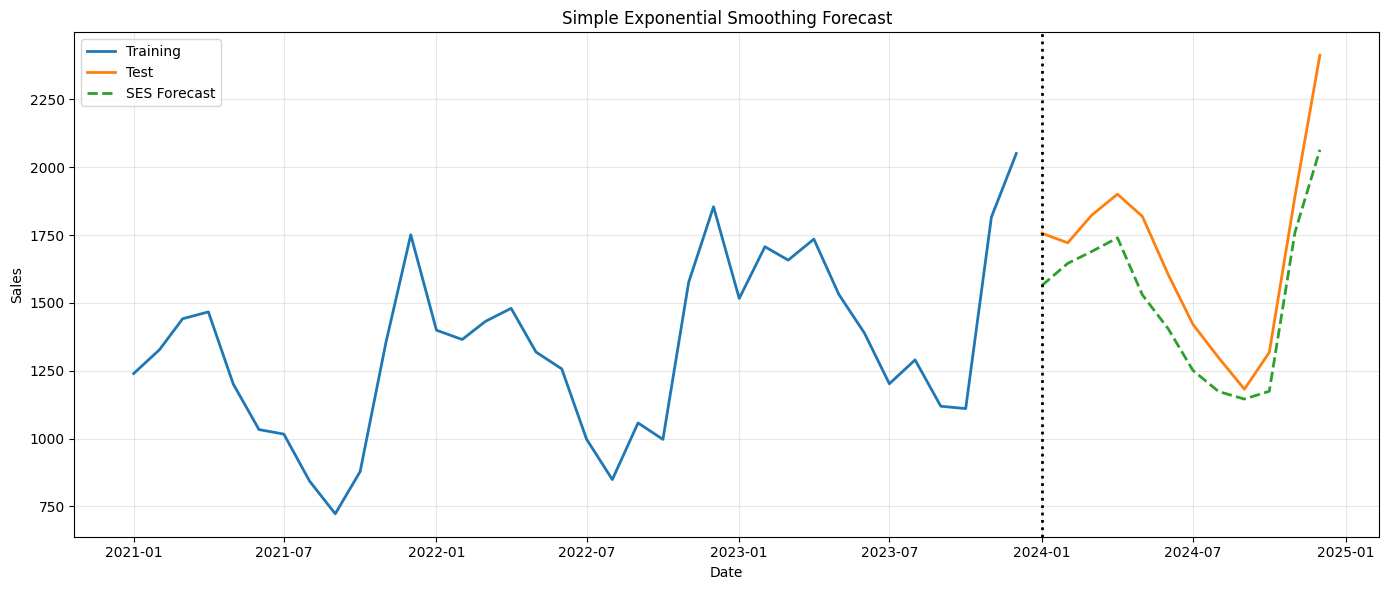

In [9]:
print("\nA4: Simple Exponential Smoothing\n")

# Split data - first 36 months for training
train_size = 36
train = df_sales['Sales'][:train_size]
test = df_sales['Sales'][train_size:]

# Deseasonalize using seasonal averages
seasonal_avg = df_sales[:train_size].groupby('Month')['Sales'].mean()
overall_mean = train.mean()
seasonal_idx = seasonal_avg - overall_mean

print("Seasonal indices (deviation from mean):")
for m, idx in seasonal_idx.items():
    print(f"  Month {m}: {idx:+.2f}")

# Deseasonalize training data
train_deseas = train.copy()
for i in range(len(train)):
    month = df_sales.index[i].month
    train_deseas.iloc[i] -= seasonal_idx[month]

# Fit SES
ses_model = SimpleExpSmoothing(train_deseas).fit(optimized=True)
alpha_opt = ses_model.params['smoothing_level']

print(f"\nOptimized alpha: {alpha_opt:.4f}")
if alpha_opt < 0.3:
    print("Low alpha -> model reacts slowly to new data (stable series)")
elif alpha_opt > 0.7:
    print("High alpha -> model reacts quickly to new data (volatile series)")
else:
    print("Medium alpha -> balanced between stability and responsiveness")

# Generate forecasts
fc_deseas = ses_model.forecast(steps=12)

# Add seasonality back - ensure proper handling
if isinstance(fc_deseas, pd.Series):
    fc_ses = fc_deseas.copy()
else:
    fc_ses = pd.Series(fc_deseas, index=df_sales.index[train_size:train_size+12])

for i in range(len(fc_ses)):
    month = df_sales.index[train_size + i].month
    if isinstance(fc_ses, pd.Series):
        fc_ses.iloc[i] += seasonal_idx[month]
    else:
        fc_ses[i] += seasonal_idx[month]

# Calculate accuracy
errors = test.values - (fc_ses.values if hasattr(fc_ses, 'values') else fc_ses)
mae_ses = np.mean(np.abs(errors))
rmse_ses = np.sqrt(np.mean(errors**2))
mape_ses = np.mean(np.abs(errors / test.values)) * 100

print(f"\nForecast Accuracy (holdout period):")
print(f"  MAE:  {mae_ses:.2f}")
print(f"  RMSE: {rmse_ses:.2f}")
print(f"  MAPE: {mape_ses:.2f}%")

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_sales.index[:train_size], train, label='Training', linewidth=2)
ax.plot(df_sales.index[train_size:], test, label='Test', linewidth=2)
ax.plot(df_sales.index[train_size:], fc_ses, label='SES Forecast', linewidth=2, linestyle='--')
ax.axvline(x=df_sales.index[train_size], color='black', linestyle=':', linewidth=2)
ax.set_title('Simple Exponential Smoothing Forecast')
ax.set_ylabel('Sales')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('A4_ses.png', dpi=300, bbox_inches='tight')
plt.show()

### A5: Holt's Linear Trend Method


A5: Holt's Method

Optimized parameters:
  alpha (level): 0.2201
  beta (trend):  0.0000

Final state:
  Level: 1539.15
  Trend: 10.56

Holt Forecast Accuracy:
  MAE:  87.55
  RMSE: 109.84
  MAPE: 5.01%


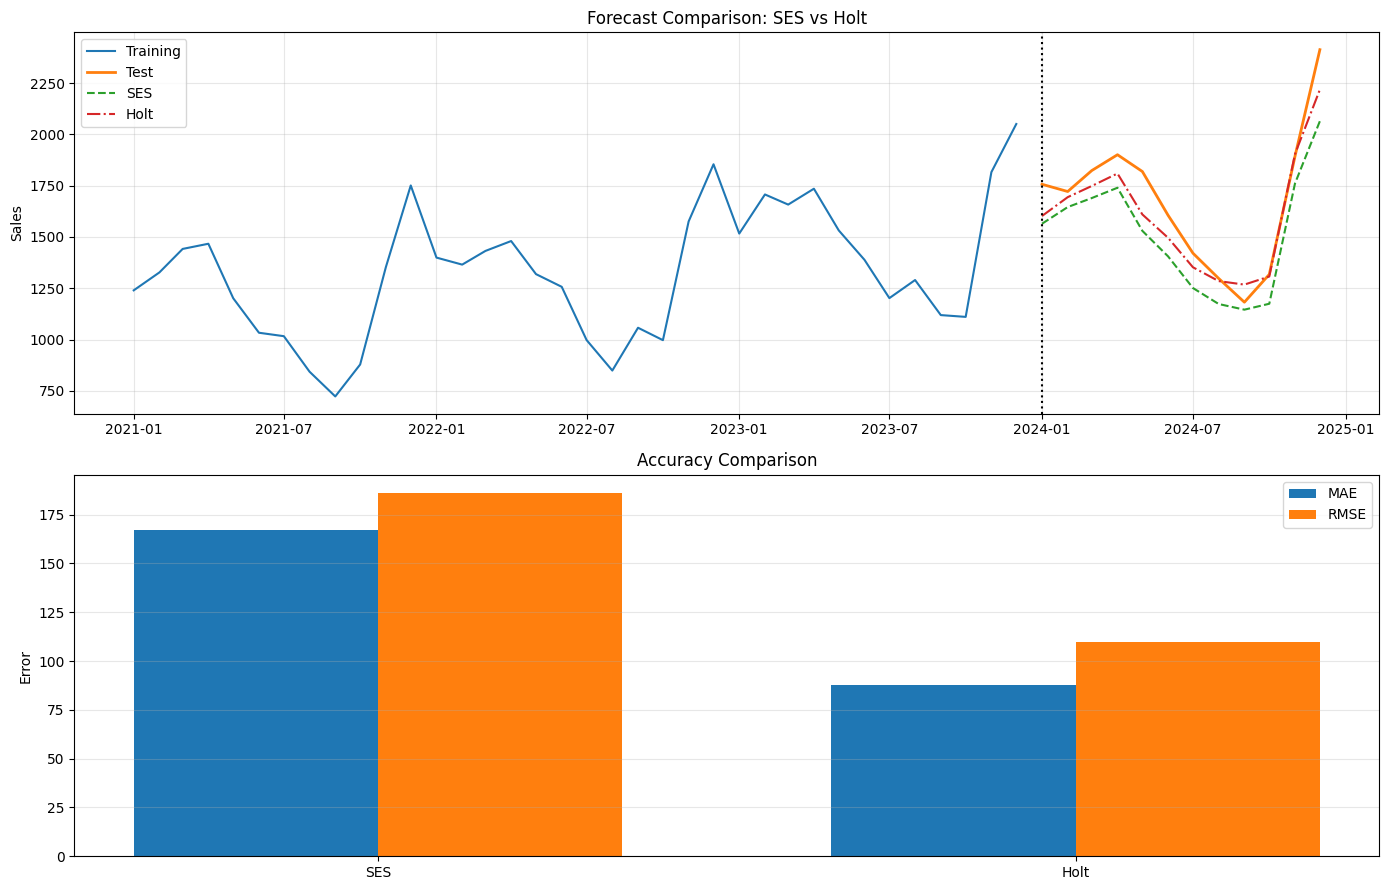


Holt's method performs better by capturing the trend.


In [10]:
print("\nA5: Holt's Method\n")

# Fit Holt on deseasonalized data
holt_model = ExponentialSmoothing(train_deseas, trend='add', seasonal=None).fit(optimized=True)

alpha_h = holt_model.params['smoothing_level']
beta_h = holt_model.params['smoothing_trend']

print(f"Optimized parameters:")
print(f"  alpha (level): {alpha_h:.4f}")
print(f"  beta (trend):  {beta_h:.4f}")

print(f"\nFinal state:")
print(f"  Level: {holt_model.level.iloc[-1]:.2f}")
print(f"  Trend: {holt_model.trend.iloc[-1]:.2f}")

# Forecast
fc_holt_deseas = holt_model.forecast(steps=12)

# Add seasonality back - ensure proper handling
if isinstance(fc_holt_deseas, pd.Series):
    fc_holt = fc_holt_deseas.copy()
else:
    fc_holt = pd.Series(fc_holt_deseas, index=df_sales.index[train_size:train_size+12])

for i in range(len(fc_holt)):
    month = df_sales.index[train_size + i].month
    if isinstance(fc_holt, pd.Series):
        fc_holt.iloc[i] += seasonal_idx[month]
    else:
        fc_holt[i] += seasonal_idx[month]

errors_h = test.values - (fc_holt.values if hasattr(fc_holt, 'values') else fc_holt)
mae_h = np.mean(np.abs(errors_h))
rmse_h = np.sqrt(np.mean(errors_h**2))
mape_h = np.mean(np.abs(errors_h / test.values)) * 100

print(f"\nHolt Forecast Accuracy:")
print(f"  MAE:  {mae_h:.2f}")
print(f"  RMSE: {rmse_h:.2f}")
print(f"  MAPE: {mape_h:.2f}%")

# Compare with SES
fig, axes = plt.subplots(2, 1, figsize=(14, 9))

axes[0].plot(df_sales.index[:train_size], train, label='Training')
axes[0].plot(df_sales.index[train_size:], test, label='Test', linewidth=2)
axes[0].plot(df_sales.index[train_size:], fc_ses, label='SES', linestyle='--')
axes[0].plot(df_sales.index[train_size:], fc_holt, label="Holt", linestyle='-.')
axes[0].axvline(x=df_sales.index[train_size], color='black', linestyle=':')
axes[0].set_title('Forecast Comparison: SES vs Holt')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

models = ['SES', 'Holt']
mae_vals = [mae_ses, mae_h]
rmse_vals = [rmse_ses, rmse_h]
x = np.arange(len(models))
width = 0.35
axes[1].bar(x - width/2, mae_vals, width, label='MAE')
axes[1].bar(x + width/2, rmse_vals, width, label='RMSE')
axes[1].set_ylabel('Error')
axes[1].set_title('Accuracy Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('A5_holt.png', dpi=300, bbox_inches='tight')
plt.show()

if rmse_h < rmse_ses:
    print("\nHolt's method performs better by capturing the trend.")
else:
    print("\nSES performs better on this data - trend may not be strong enough.")

### A6: Holt-Winters Seasonal Method


A6: Holt-Winters Method

Optimized parameters:
  alpha (level):    0.1694
  beta (trend):     0.1694
  gamma (seasonal): 0.0000

Final state:
  Level: 1605.11
  Trend: 17.61

Seasonal indices (last 12):
  Month 1: 118.05
  Month 2: 187.69
  Month 3: 219.70
  Month 4: 257.72
  Month 5: 35.10
  Month 6: -102.14
  Month 7: -269.64
  Month 8: -360.99
  Month 9: -402.46
  Month 10: -387.77
  Month 11: 184.06
  Month 12: 472.86


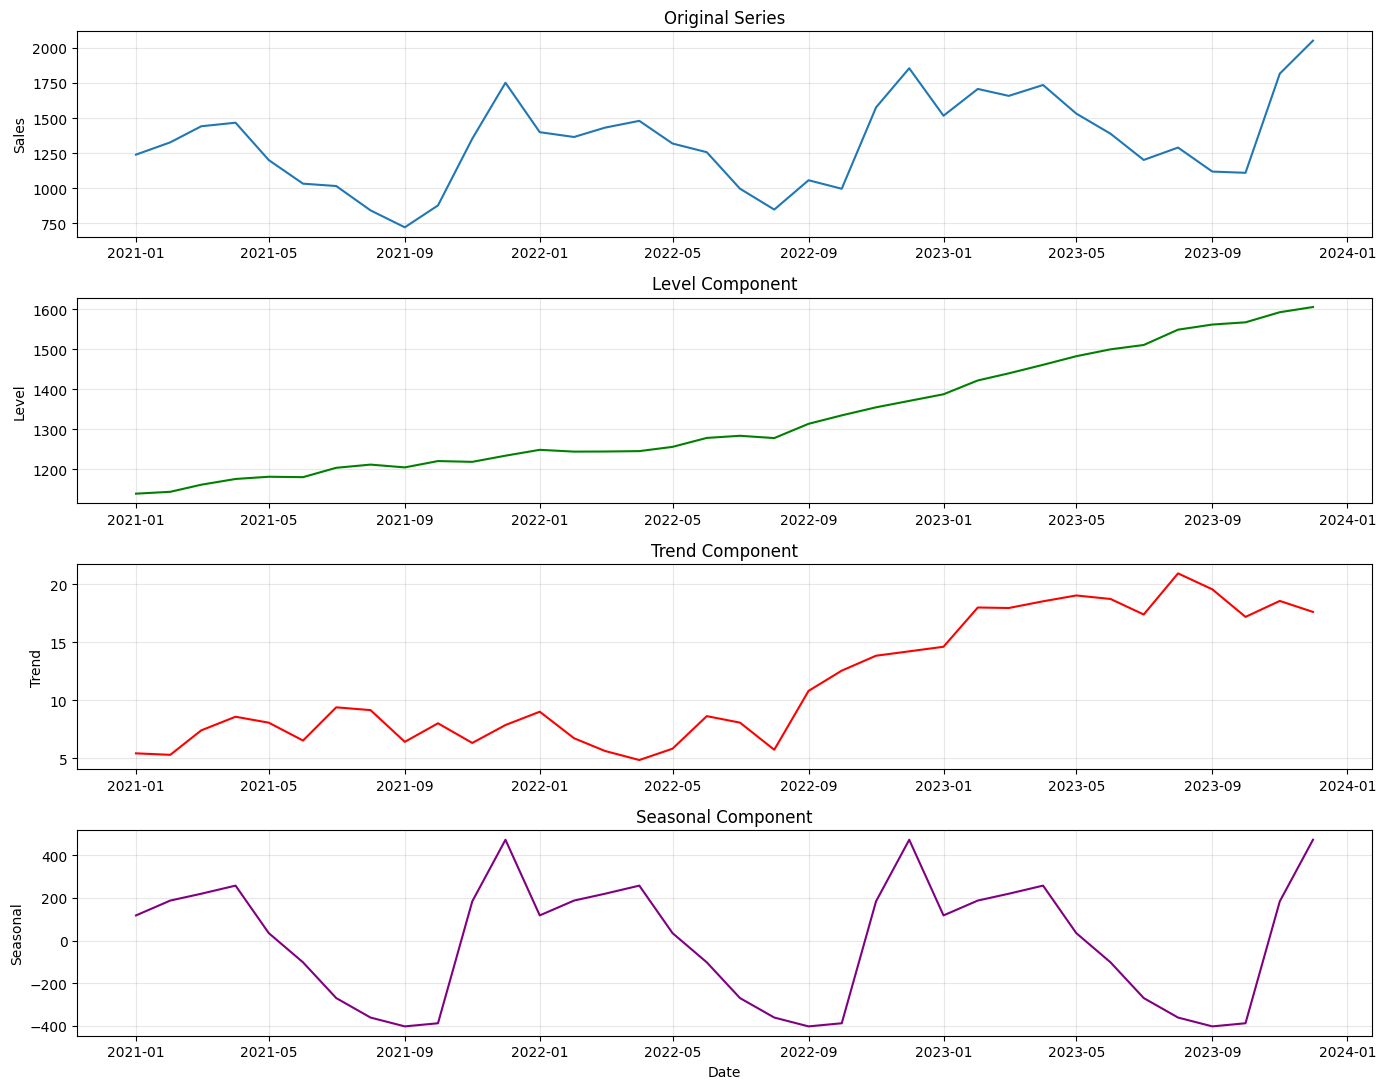


Holt-Winters Forecast Accuracy:
  MAE:  74.69
  RMSE: 88.52
  MAPE: 4.76%

Overall Model Comparison

       Model    MAE   RMSE  MAPE
  Regression  44.65  61.58  2.63
         SES 167.26 186.05  9.70
        Holt  87.55 109.84  5.01
Holt-Winters  74.69  88.52  4.76

Best model (by RMSE): Regression


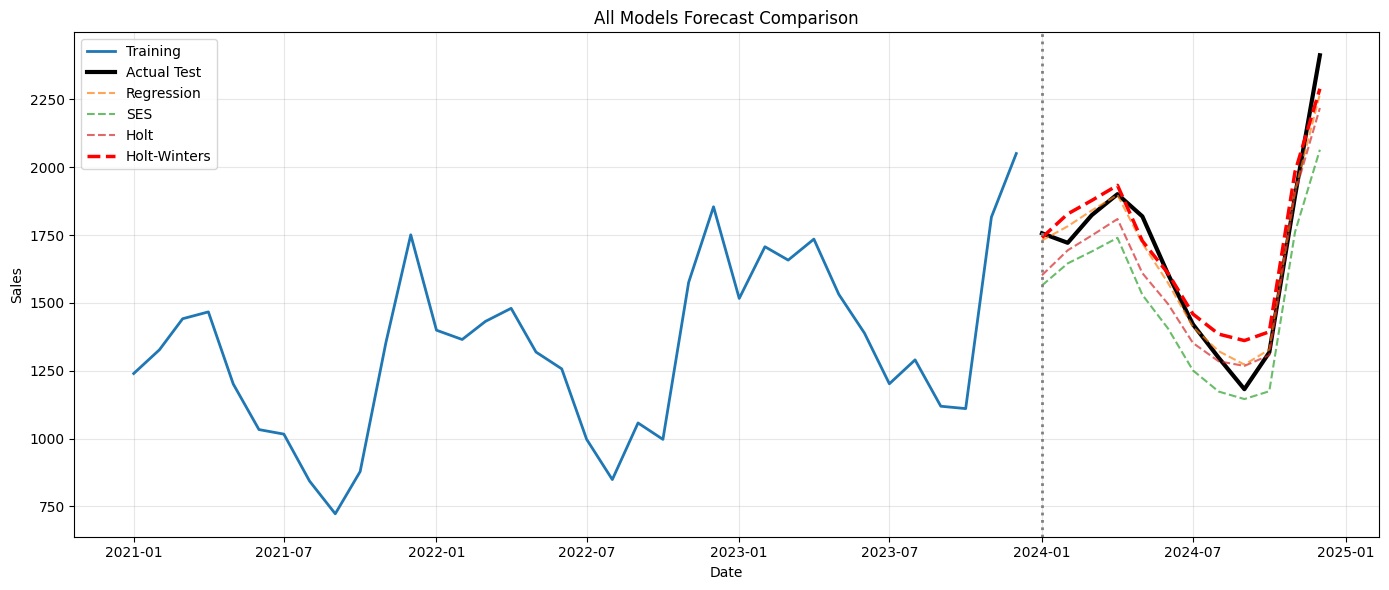

In [11]:
print("\nA6: Holt-Winters Method\n")

# Fit Holt-Winters with additive seasonality
hw_model = ExponentialSmoothing(
    train, trend='add', seasonal='add', seasonal_periods=12
).fit(optimized=True)

print(f"Optimized parameters:")
print(f"  alpha (level):    {hw_model.params['smoothing_level']:.4f}")
print(f"  beta (trend):     {hw_model.params['smoothing_trend']:.4f}")
print(f"  gamma (seasonal): {hw_model.params['smoothing_seasonal']:.4f}")

print(f"\nFinal state:")
print(f"  Level: {hw_model.level.iloc[-1]:.2f}")
print(f"  Trend: {hw_model.trend.iloc[-1]:.2f}")

print(f"\nSeasonal indices (last 12):")
for i in range(12):
    print(f"  Month {i+1}: {hw_model.season.iloc[-(12-i)]:.2f}")

# Decomposition plot
fig, axes = plt.subplots(4, 1, figsize=(14, 11))

axes[0].plot(df_sales.index[:train_size], train)
axes[0].set_title('Original Series')
axes[0].set_ylabel('Sales')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_sales.index[:train_size], hw_model.level, color='green')
axes[1].set_title('Level Component')
axes[1].set_ylabel('Level')
axes[1].grid(True, alpha=0.3)

axes[2].plot(df_sales.index[:train_size], hw_model.trend, color='red')
axes[2].set_title('Trend Component')
axes[2].set_ylabel('Trend')
axes[2].grid(True, alpha=0.3)

axes[3].plot(df_sales.index[:train_size], hw_model.season, color='purple')
axes[3].set_title('Seasonal Component')
axes[3].set_ylabel('Seasonal')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('A6_hw_decomp.png', dpi=300, bbox_inches='tight')
plt.show()

# Forecast
fc_hw = hw_model.forecast(steps=12)
errors_hw = test.values - fc_hw.values
mae_hw = np.mean(np.abs(errors_hw))
rmse_hw = np.sqrt(np.mean(errors_hw**2))
mape_hw = np.mean(np.abs(errors_hw / test.values)) * 100

print(f"\nHolt-Winters Forecast Accuracy:")
print(f"  MAE:  {mae_hw:.2f}")
print(f"  RMSE: {rmse_hw:.2f}")
print(f"  MAPE: {mape_hw:.2f}%")

# Overall comparison
print("\n" + "="*60)
print("Overall Model Comparison")
print("="*60)

# Get regression forecast on test set
X_test = X.iloc[train_size:]
fc_reg = model_reg.predict(X_test)
err_reg = test.values - fc_reg.values
mae_reg = np.mean(np.abs(err_reg))
rmse_reg = np.sqrt(np.mean(err_reg**2))
mape_reg = np.mean(np.abs(err_reg / test.values)) * 100

comp_table = pd.DataFrame({
    'Model': ['Regression', 'SES', 'Holt', 'Holt-Winters'],
    'MAE': [mae_reg, mae_ses, mae_h, mae_hw],
    'RMSE': [rmse_reg, rmse_ses, rmse_h, rmse_hw],
    'MAPE': [mape_reg, mape_ses, mape_h, mape_hw]
})
comp_table = comp_table.round(2)
print("\n" + comp_table.to_string(index=False))

best_idx = comp_table['RMSE'].idxmin()
print(f"\nBest model (by RMSE): {comp_table.loc[best_idx, 'Model']}")

# Plot all forecasts
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_sales.index[:train_size], train, label='Training', linewidth=2)
ax.plot(df_sales.index[train_size:], test, label='Actual Test', linewidth=3, color='black')
ax.plot(df_sales.index[train_size:], fc_reg, label='Regression', linestyle='--', alpha=0.7)
ax.plot(df_sales.index[train_size:], fc_ses, label='SES', linestyle='--', alpha=0.7)
ax.plot(df_sales.index[train_size:], fc_holt, label='Holt', linestyle='--', alpha=0.7)
ax.plot(df_sales.index[train_size:], fc_hw, label='Holt-Winters', linestyle='--', linewidth=2.5, color='red')
ax.axvline(x=df_sales.index[train_size], color='gray', linestyle=':', linewidth=2)
ax.set_title('All Models Forecast Comparison')
ax.set_ylabel('Sales')
ax.set_xlabel('Date')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('A6_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

---
## Part B: ARIMA Models

### Dataset 2: Stock Returns

In [12]:
# Generate stock price data
print("\nDataset 2: Daily Stock Returns\n" + "="*50)

n_days = 500
dates_stock = pd.date_range('2023-01-01', periods=n_days, freq='D')

# Generate AR(1) returns
returns = np.zeros(n_days)
returns[0] = np.random.normal(0, 0.01)
phi = 0.05

for i in range(1, n_days):
    returns[i] = phi * returns[i-1] + np.random.normal(0, 0.015)

price = 100 * np.exp(np.cumsum(returns))

df_stock = pd.DataFrame({
    'Date': dates_stock,
    'Price': price,
    'Returns': returns * 100
})
df_stock.set_index('Date', inplace=True)

print(f"Date range: {df_stock.index[0].date()} to {df_stock.index[-1].date()}")
print(f"Number of observations: {len(df_stock)}\n")
print("Price statistics:")
print(df_stock['Price'].describe())
print("\nReturns statistics:")
print(df_stock['Returns'].describe())


Dataset 2: Daily Stock Returns
Date range: 2023-01-01 to 2024-05-14
Number of observations: 500

Price statistics:
count    500.000000
mean     115.002874
std       12.793924
min       94.210519
25%      102.898666
50%      115.340500
75%      125.312316
max      149.153080
Name: Price, dtype: float64

Returns statistics:
count    500.000000
mean       0.001484
std        1.472970
min       -4.869692
25%       -1.047798
50%        0.032790
75%        0.963816
max        5.819740
Name: Returns, dtype: float64


### B1: Stationarity Tests


B1: Stationarity Tests



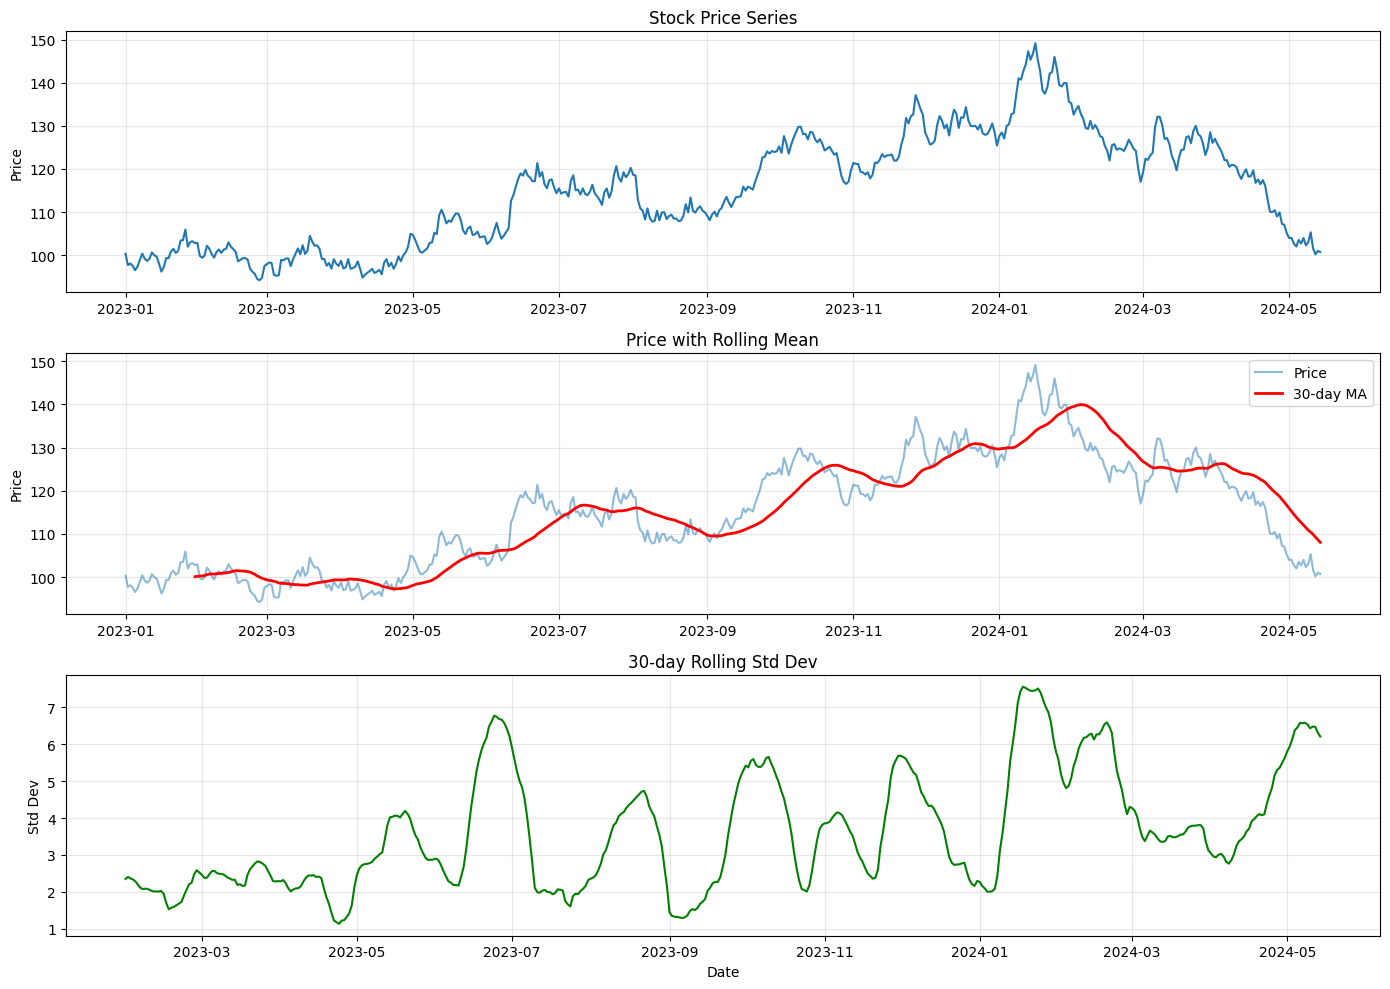

Visual check: Price series appears non-stationary (has trend/changing mean)

Augmented Dickey-Fuller Test - Price Series

ADF Statistic: -1.5185
p-value: 0.5243
Lags used: 0

Critical values:
  1%: -3.4435
  5%: -2.8673
  10%: -2.5699

H0: Unit root (non-stationary)
H1: No unit root (stationary)
Decision (alpha=0.05): Fail to reject H0 - series is non-stationary

KPSS Test - Price Series

KPSS Statistic: 2.5618
p-value: 0.0100
Lags used: 12

Critical values:
  10%: 0.3470
  5%: 0.4630
  2.5%: 0.5740
  1%: 0.7390

H0: Series is stationary
H1: Series is non-stationary
Decision (alpha=0.05): Reject H0 - series is non-stationary

Combined Interpretation

ADF and KPSS should be interpreted together:
- ADF: Cannot reject unit root (non-stationary)
- KPSS: Reject stationarity (non-stationary)
- Conclusion: Both tests indicate price series is non-stationary

Price series needs differencing to achieve stationarity.


In [13]:
print("\nB1: Stationarity Tests\n")

# Visual check
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(df_stock.index, df_stock['Price'])
axes[0].set_title('Stock Price Series')
axes[0].set_ylabel('Price')
axes[0].grid(True, alpha=0.3)

roll_mean = df_stock['Price'].rolling(window=30).mean()
axes[1].plot(df_stock.index, df_stock['Price'], alpha=0.5, label='Price')
axes[1].plot(df_stock.index, roll_mean, linewidth=2, color='red', label='30-day MA')
axes[1].set_title('Price with Rolling Mean')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

roll_std = df_stock['Price'].rolling(window=30).std()
axes[2].plot(df_stock.index, roll_std, color='green')
axes[2].set_title('30-day Rolling Std Dev')
axes[2].set_ylabel('Std Dev')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('B1_stationarity_visual.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visual check: Price series appears non-stationary (has trend/changing mean)\n")

# ADF test
print("="*60)
print("Augmented Dickey-Fuller Test - Price Series")
print("="*60)

adf_result = adfuller(df_stock['Price'].dropna(), autolag='AIC')
print(f"\nADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Lags used: {adf_result[2]}")
print(f"\nCritical values:")
for key, val in adf_result[4].items():
    print(f"  {key}: {val:.4f}")

print(f"\nH0: Unit root (non-stationary)")
print(f"H1: No unit root (stationary)")
if adf_result[1] < 0.05:
    print(f"Decision (alpha=0.05): Reject H0 - series is stationary")
else:
    print(f"Decision (alpha=0.05): Fail to reject H0 - series is non-stationary")

# KPSS test
print("\n" + "="*60)
print("KPSS Test - Price Series")
print("="*60)

kpss_result = kpss(df_stock['Price'].dropna(), regression='c', nlags='auto')
print(f"\nKPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")
print(f"Lags used: {kpss_result[2]}")
print(f"\nCritical values:")
for key, val in kpss_result[3].items():
    print(f"  {key}: {val:.4f}")

print(f"\nH0: Series is stationary")
print(f"H1: Series is non-stationary")
if kpss_result[1] < 0.05:
    print(f"Decision (alpha=0.05): Reject H0 - series is non-stationary")
else:
    print(f"Decision (alpha=0.05): Fail to reject H0 - series is stationary")

# Interpretation
print("\n" + "="*60)
print("Combined Interpretation")
print("="*60)
print("\nADF and KPSS should be interpreted together:")
if adf_result[1] >= 0.05 and kpss_result[1] < 0.05:
    print("- ADF: Cannot reject unit root (non-stationary)")
    print("- KPSS: Reject stationarity (non-stationary)")
    print("- Conclusion: Both tests indicate price series is non-stationary")
elif adf_result[1] < 0.05 and kpss_result[1] >= 0.05:
    print("- ADF: Reject unit root (stationary)")
    print("- KPSS: Cannot reject stationarity (stationary)")
    print("- Conclusion: Both tests indicate price series is stationary")
else:
    print("- Tests give conflicting results, further analysis needed")
print("\nPrice series needs differencing to achieve stationarity.")

### B2: First Differencing


B2: Differencing for Stationarity



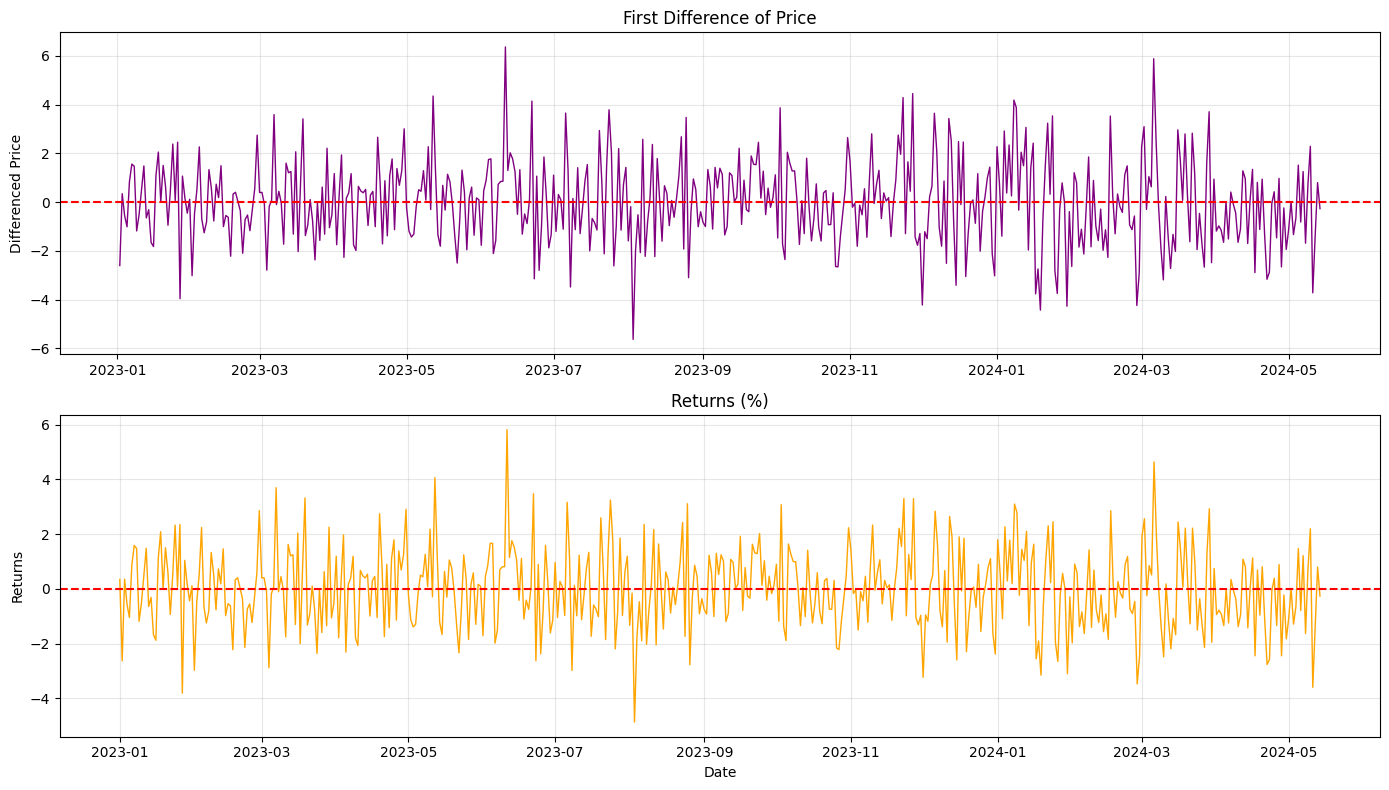

ADF Test - Differenced Price Series

ADF Statistic: -21.4086
p-value: 0.000000

Critical values:
  1%: -3.4435
  5%: -2.8674
  10%: -2.5699

Conclusion: Differenced series is now stationary! (p < 0.05)

Differenced Price vs Returns

Correlation between differenced price and returns: 0.9937

Explanation:
- Differenced price: delta_p_t = p_t - p_t-1 (absolute change)
- Returns: r_t = (p_t - p_t-1)/p_t-1 (relative change)
- For small changes, r_t ≈ log(p_t/p_t-1) ≈ delta_log(p_t)
- High correlation shows they capture similar information


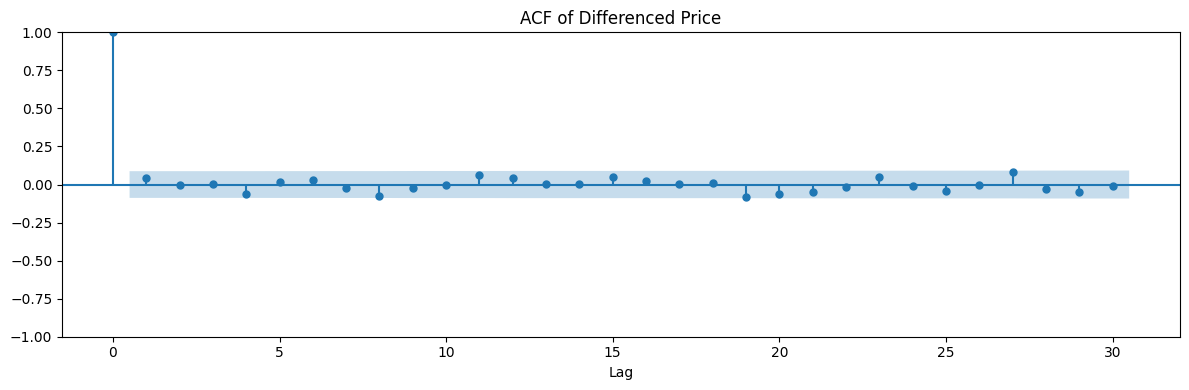


No significant autocorrelations in first 30 lags


In [14]:
print("\nB2: Differencing for Stationarity\n")

# First difference
diff_price = df_stock['Price'].diff().dropna()

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(diff_price.index, diff_price, linewidth=1, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('First Difference of Price')
axes[0].set_ylabel('Differenced Price')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_stock.index, df_stock['Returns'], linewidth=1, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Returns (%)')
axes[1].set_ylabel('Returns')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('B2_differencing.png', dpi=300, bbox_inches='tight')
plt.show()

# ADF on differenced series
print("="*60)
print("ADF Test - Differenced Price Series")
print("="*60)

adf_diff = adfuller(diff_price, autolag='AIC')
print(f"\nADF Statistic: {adf_diff[0]:.4f}")
print(f"p-value: {adf_diff[1]:.6f}")
print(f"\nCritical values:")
for key, val in adf_diff[4].items():
    print(f"  {key}: {val:.4f}")

if adf_diff[1] < 0.05:
    print(f"\nConclusion: Differenced series is now stationary! (p < 0.05)")
else:
    print(f"\nConclusion: Differenced series may still be non-stationary")

# Compare with returns
print("\n" + "="*60)
print("Differenced Price vs Returns")
print("="*60)

returns_aligned = df_stock['Returns'].iloc[1:]
corr = np.corrcoef(diff_price, returns_aligned)[0, 1]

print(f"\nCorrelation between differenced price and returns: {corr:.4f}")
print(f"\nExplanation:")
print(f"- Differenced price: delta_p_t = p_t - p_t-1 (absolute change)")
print(f"- Returns: r_t = (p_t - p_t-1)/p_t-1 (relative change)")
print(f"- For small changes, r_t ≈ log(p_t/p_t-1) ≈ delta_log(p_t)")
print(f"- High correlation shows they capture similar information")

# ACF of differenced price
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(diff_price, lags=30, ax=ax)
ax.set_title('ACF of Differenced Price')
ax.set_xlabel('Lag')
plt.tight_layout()
plt.savefig('B2_diff_acf.png', dpi=300, bbox_inches='tight')
plt.show()

from statsmodels.tsa.stattools import acf
acf_vals = acf(diff_price, nlags=30, alpha=0.05)
sig_lags = np.where(np.abs(acf_vals[0][1:]) > 1.96/np.sqrt(len(diff_price)))[0] + 1

if len(sig_lags) > 0:
    print(f"\nSignificant autocorrelations at lags: {sig_lags.tolist()[:5]}")
else:
    print(f"\nNo significant autocorrelations in first 30 lags")

### B3: ACF and PACF Analysis


B3: ACF and PACF



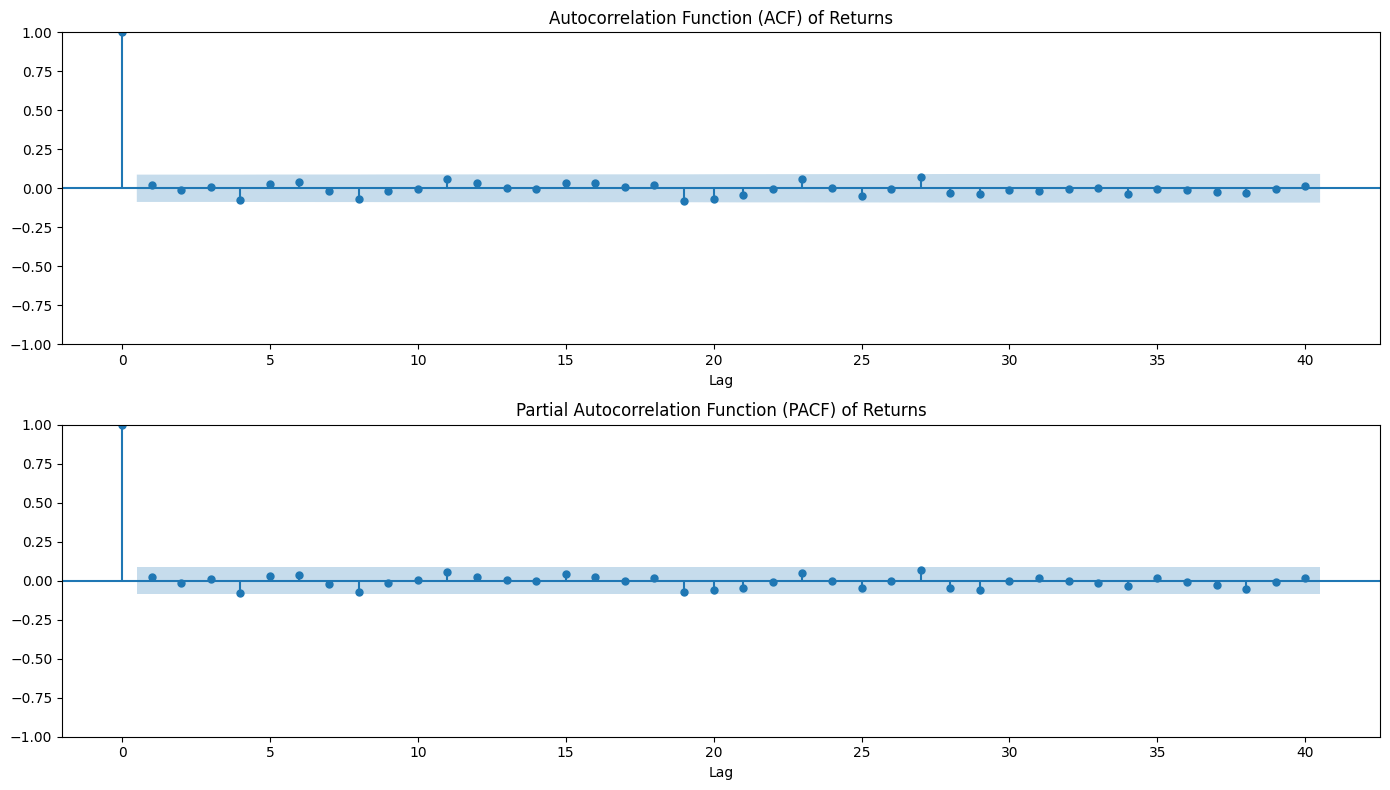

ACF and PACF Interpretation:

Significant ACF spikes (first 10): None
Significant PACF spikes (first 10): None

ACF pattern:
  ACF cuts off quickly -> suggests MA model

PACF pattern:
  PACF mixed pattern -> may need ARMA model

Suggested ARIMA Orders

Based on ACF/PACF:
  Suggested AR order (p): 0
  Suggested I order (d): 0 (returns already stationary)
  Suggested MA order (q): 0

Candidate model: ARIMA(0,0,0)

Manual Autocorrelation Calculations

rho(1) = Corr(returns_t, returns_t-1) = 0.023787
rho(5) = Corr(returns_t, returns_t-5) = 0.027254

rho(1) is not significant, returns are close to uncorrelated


In [15]:
print("\nB3: ACF and PACF\n")

returns_clean = df_stock['Returns'].dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(returns_clean, lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of Returns')
axes[0].set_xlabel('Lag')

plot_pacf(returns_clean, lags=40, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) of Returns')
axes[1].set_xlabel('Lag')

plt.tight_layout()
plt.savefig('B3_acf_pacf.png', dpi=300, bbox_inches='tight')
plt.show()

# Interpretation
print("ACF and PACF Interpretation:")
print("="*60)

from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(returns_clean, nlags=40)
pacf_vals = pacf(returns_clean, nlags=40, method='ywm')

ci = 1.96 / np.sqrt(len(returns_clean))
sig_acf = np.where(np.abs(acf_vals[1:]) > ci)[0] + 1
sig_pacf = np.where(np.abs(pacf_vals[1:]) > ci)[0] + 1

print(f"\nSignificant ACF spikes (first 10): {sig_acf[:10].tolist() if len(sig_acf) > 0 else 'None'}")
print(f"Significant PACF spikes (first 10): {sig_pacf[:10].tolist() if len(sig_pacf) > 0 else 'None'}")

print(f"\nACF pattern:")
if len(sig_acf) > 5:
    print("  ACF decays gradually -> suggests AR model")
elif len(sig_acf) <= 3:
    print("  ACF cuts off quickly -> suggests MA model")
else:
    print("  ACF mixed pattern -> may need ARMA model")

print(f"\nPACF pattern:")
if len(sig_pacf) > 5:
    print("  PACF decays gradually -> suggests MA model")
elif len(sig_pacf) <= 3 and len(sig_pacf) > 0:
    print(f"  PACF cuts off after lag {len(sig_pacf)} -> suggests AR({len(sig_pacf)}) model")
else:
    print("  PACF mixed pattern -> may need ARMA model")

# Suggest model orders
print("\n" + "="*60)
print("Suggested ARIMA Orders")
print("="*60)

if len(sig_pacf) > 0:
    p_suggest = min(sig_pacf[:3])
else:
    p_suggest = 0

if len(sig_acf) > 0:
    q_suggest = min(sig_acf[:3])
else:
    q_suggest = 0

print(f"\nBased on ACF/PACF:")
print(f"  Suggested AR order (p): {p_suggest}")
print(f"  Suggested I order (d): 0 (returns already stationary)")
print(f"  Suggested MA order (q): {q_suggest}")
print(f"\nCandidate model: ARIMA({p_suggest},0,{q_suggest})")

# Manual correlation calculations
print("\n" + "="*60)
print("Manual Autocorrelation Calculations")
print("="*60)

rho1 = returns_clean[:-1].corr(returns_clean.shift(-1)[:-1])
rho5 = returns_clean[:-5].corr(returns_clean.shift(-5)[:-5])

print(f"\nrho(1) = Corr(returns_t, returns_t-1) = {rho1:.6f}")
print(f"rho(5) = Corr(returns_t, returns_t-5) = {rho5:.6f}")

if abs(rho1) > ci:
    print(f"\nrho(1) is significantly different from zero, indicates first-order autocorrelation")
else:
    print(f"\nrho(1) is not significant, returns are close to uncorrelated")

### B4: AR Model Estimation


B4: AR(p) Models

AR(1) Model
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -902.468
Date:                Wed, 11 Feb 2026   AIC                           1810.936
Time:                        20:02:09   BIC                           1823.579
Sample:                    01-01-2023   HQIC                          1815.897
                         - 05-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.068      0.022      0.983      -0.132       0.135
ar.L1          0.0237      0.046      0.516      0.606      -0.066       0.114
sigma2         2.1641

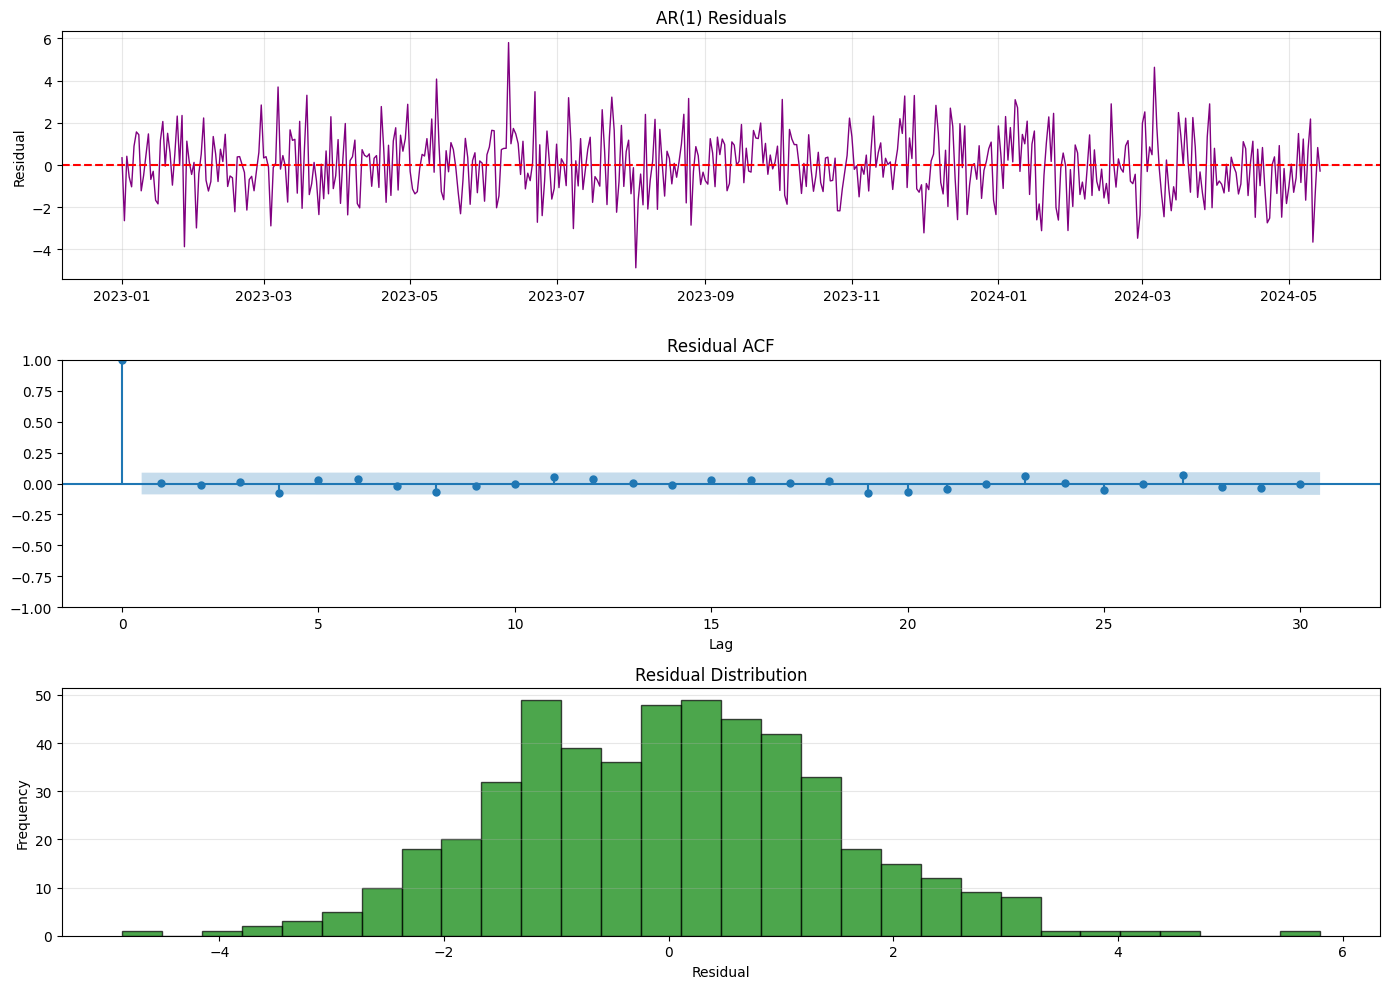


Ljung-Box Test (residuals):
      lb_stat  lb_pvalue
10   6.853996   0.739153
20  15.972778   0.718312

Conclusion: Residuals resemble white noise (all p-values > 0.05)


In [16]:
print("\nB4: AR(p) Models\n")

# Fit AR(1)
print("="*60)
print("AR(1) Model")
print("="*60)

ar1 = ARIMA(returns_clean, order=(1, 0, 0)).fit()
print(ar1.summary())

# Interpret coefficients
phi1 = ar1.params['ar.L1']
print(f"\nAR(1) coefficient interpretation:")
print(f"  phi_1 = {phi1:.6f}")

pval_phi1 = ar1.pvalues['ar.L1']
if pval_phi1 < 0.05:
    print(f"  phi_1 is significant at alpha=0.05 (p={pval_phi1:.6f})")
else:
    print(f"  phi_1 is not significant (p={pval_phi1:.6f})")

if phi1 > 0:
    print(f"  Positive coefficient -> positive autocorrelation: positive returns tend to follow positive returns")
elif phi1 < 0:
    print(f"  Negative coefficient -> negative autocorrelation: mean reversion pattern")

# Stationarity check
print(f"\nStationarity condition: |phi_1| < 1")
print(f"  |{phi1:.6f}| = {abs(phi1):.6f}")
if abs(phi1) < 1:
    print(f"  Stationarity condition satisfied")
else:
    print(f"  Stationarity condition NOT satisfied")

# Fit AR(2) and AR(3)
print("\n" + "="*60)
print("Model Comparison: AR(1) vs AR(2) vs AR(3)")
print("="*60)

ar2 = ARIMA(returns_clean, order=(2, 0, 0)).fit()
ar3 = ARIMA(returns_clean, order=(3, 0, 0)).fit()

ar_comp = pd.DataFrame({
    'Model': ['AR(1)', 'AR(2)', 'AR(3)'],
    'AIC': [ar1.aic, ar2.aic, ar3.aic],
    'BIC': [ar1.bic, ar2.bic, ar3.bic],
    'Log-Lik': [ar1.llf, ar2.llf, ar3.llf]
})
ar_comp = ar_comp.round(4)
print("\n" + ar_comp.to_string(index=False))

best_ar = ar_comp.loc[ar_comp['AIC'].idxmin(), 'Model']
print(f"\nBest model by AIC: {best_ar}")

# Residual diagnostics for best model
if best_ar == 'AR(1)':
    best_ar_model = ar1
elif best_ar == 'AR(2)':
    best_ar_model = ar2
else:
    best_ar_model = ar3

resid_ar = best_ar_model.resid

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(resid_ar, linewidth=1, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title(f'{best_ar} Residuals')
axes[0].set_ylabel('Residual')
axes[0].grid(True, alpha=0.3)

plot_acf(resid_ar, lags=30, ax=axes[1])
axes[1].set_title('Residual ACF')
axes[1].set_xlabel('Lag')

axes[2].hist(resid_ar, bins=30, alpha=0.7, edgecolor='black', color='green')
axes[2].set_title('Residual Distribution')
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('B4_ar_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb = acorr_ljungbox(resid_ar, lags=[10, 20], return_df=True)
print(f"\nLjung-Box Test (residuals):")
print(lb)

if (lb['lb_pvalue'] > 0.05).all():
    print(f"\nConclusion: Residuals resemble white noise (all p-values > 0.05)")
else:
    print(f"\nConclusion: Residuals may still have autocorrelation structure")

### B5: MA Model Estimation


B5: MA(q) Models

MA(1) Model
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -902.464
Date:                Wed, 11 Feb 2026   AIC                           1810.928
Time:                        20:02:10   BIC                           1823.572
Sample:                    01-01-2023   HQIC                          1815.889
                         - 05-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.068      0.022      0.983      -0.132       0.135
ma.L1          0.0244      0.046      0.530      0.596      -0.066       0.115
sigma2         2.1640

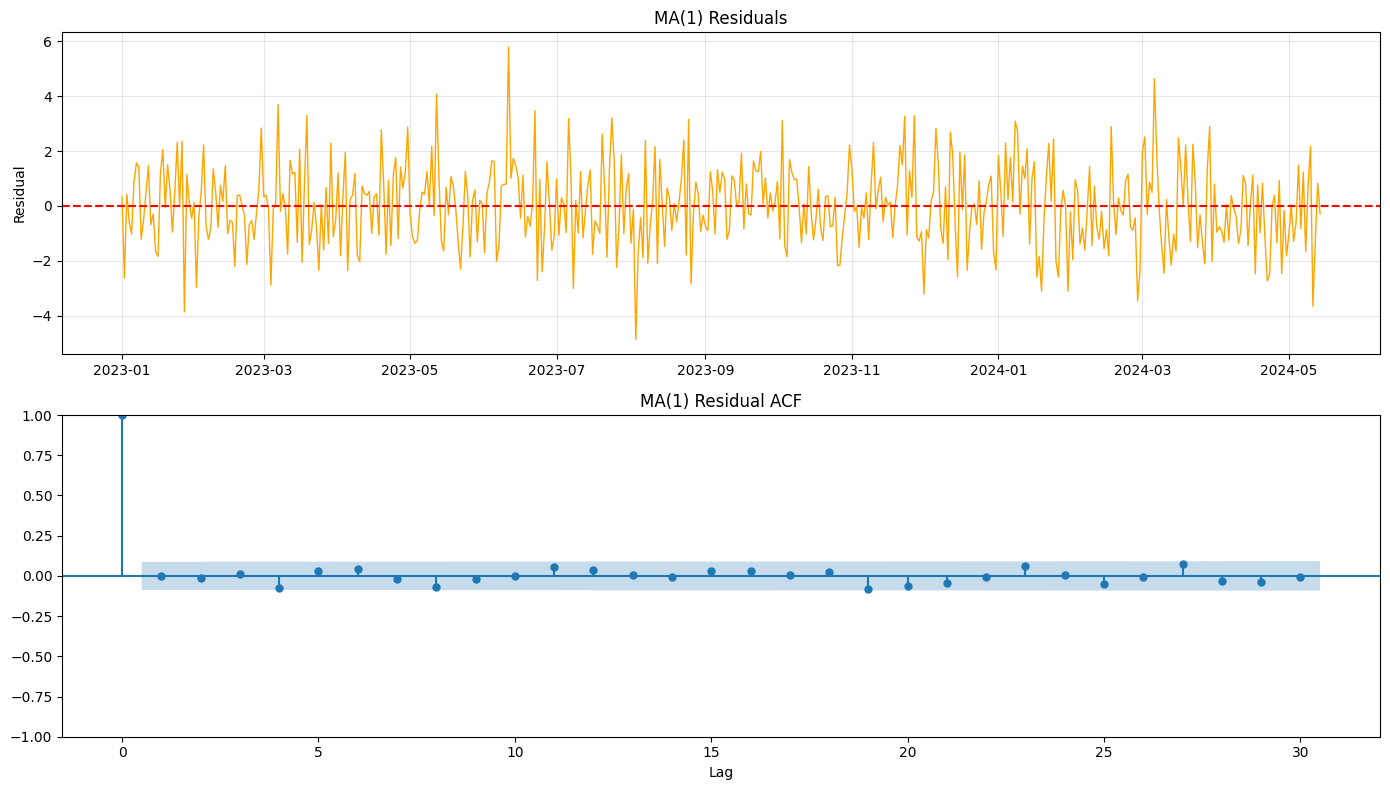


Ljung-Box Test (MA(1) residuals):
      lb_stat  lb_pvalue
10   6.840982   0.740367
20  15.950224   0.719707

Conclusion: MA(1) residuals resemble white noise


In [17]:
print("\nB5: MA(q) Models\n")

# Fit MA(1)
print("="*60)
print("MA(1) Model")
print("="*60)

ma1 = ARIMA(returns_clean, order=(0, 0, 1)).fit()
print(ma1.summary())

# Interpret
theta1 = ma1.params['ma.L1']
print(f"\nMA(1) coefficient interpretation:")
print(f"  theta_1 = {theta1:.6f}")

pval_theta1 = ma1.pvalues['ma.L1']
if pval_theta1 < 0.05:
    print(f"  theta_1 is significant at alpha=0.05 (p={pval_theta1:.6f})")
else:
    print(f"  theta_1 is not significant (p={pval_theta1:.6f})")

# Invertibility
print(f"\nInvertibility condition: |theta_1| < 1")
print(f"  |{theta1:.6f}| = {abs(theta1):.6f}")
if abs(theta1) < 1:
    print(f"  Invertibility condition satisfied")
else:
    print(f"  Invertibility condition NOT satisfied")

# Compare MA(1) vs AR(1)
print("\n" + "="*60)
print("Model Comparison: MA(1) vs AR(1)")
print("="*60)

ma_ar_comp = pd.DataFrame({
    'Model': ['AR(1)', 'MA(1)'],
    'AIC': [ar1.aic, ma1.aic],
    'BIC': [ar1.bic, ma1.bic],
    'Log-Lik': [ar1.llf, ma1.llf]
})
ma_ar_comp = ma_ar_comp.round(4)
print("\n" + ma_ar_comp.to_string(index=False))

if ma1.aic < ar1.aic:
    print(f"\nMA(1) fits better (lower AIC)")
else:
    print(f"\nAR(1) fits better (lower AIC)")

# MA(1) residual diagnostics
resid_ma1 = ma1.resid

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(resid_ma1, linewidth=1, color='orange')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('MA(1) Residuals')
axes[0].set_ylabel('Residual')
axes[0].grid(True, alpha=0.3)

plot_acf(resid_ma1, lags=30, ax=axes[1])
axes[1].set_title('MA(1) Residual ACF')
axes[1].set_xlabel('Lag')

plt.tight_layout()
plt.savefig('B5_ma_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

lb_ma = acorr_ljungbox(resid_ma1, lags=[10, 20], return_df=True)
print(f"\nLjung-Box Test (MA(1) residuals):")
print(lb_ma)

if (lb_ma['lb_pvalue'] > 0.05).all():
    print(f"\nConclusion: MA(1) residuals resemble white noise")
else:
    print(f"\nConclusion: MA(1) residuals may still have autocorrelation")

### B6: ARMA Model

In [18]:
print("\nB6: ARMA(p,q) Models\n")

# Fit ARMA(1,1)
print("="*60)
print("ARMA(1,1) Model")
print("="*60)

arma11 = ARIMA(returns_clean, order=(1, 0, 1)).fit()
print(arma11.summary())

# Compare with AR(1) and MA(1)
print("\n" + "="*60)
print("Model Comparison: AR(1) vs MA(1) vs ARMA(1,1)")
print("="*60)

arma_comp = pd.DataFrame({
    'Model': ['AR(1)', 'MA(1)', 'ARMA(1,1)'],
    'AIC': [ar1.aic, ma1.aic, arma11.aic],
    'BIC': [ar1.bic, ma1.bic, arma11.bic],
    'Log-Lik': [ar1.llf, ma1.llf, arma11.llf],
    'Params': [2, 2, 3]
})
arma_comp = arma_comp.round(4)
print("\n" + arma_comp.to_string(index=False))

best_idx = arma_comp['AIC'].idxmin()
print(f"\nBest model by AIC: {arma_comp.loc[best_idx, 'Model']}")

# Test for overparameterization
print("\n" + "="*60)
print("ARMA(1,1) Parameter Significance Test")
print("="*60)

print(f"\nParameter estimates and p-values:")
for param in ['ar.L1', 'ma.L1']:
    if param in arma11.params.index:
        coef = arma11.params[param]
        pval = arma11.pvalues[param]
        sig = "Significant" if pval < 0.05 else "Not significant"
        print(f"  {param}: {coef:.6f} (p={pval:.6f}) - {sig}")

print("\n" + "="*60)
print("Final Model Comparison Table")
print("="*60)
print("\n" + arma_comp.to_string(index=False))

ar_sig = arma11.pvalues.get('ar.L1', 1) < 0.05
ma_sig = arma11.pvalues.get('ma.L1', 1) < 0.05

print(f"\nConclusion:")
if ar_sig and ma_sig:
    print("Both parameters significant, ARMA(1,1) is not overparameterized")
elif not ar_sig and ma_sig:
    print("Only MA parameter significant, suggest using MA(1) model")
elif ar_sig and not ma_sig:
    print("Only AR parameter significant, suggest using AR(1) model")
else:
    print("Neither parameter significant, may need to reconsider model specification")


B6: ARMA(p,q) Models

ARMA(1,1) Model
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -901.801
Date:                Wed, 11 Feb 2026   AIC                           1811.602
Time:                        20:02:10   BIC                           1828.461
Sample:                    01-01-2023   HQIC                          1818.217
                         - 05-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.068      0.022      0.982      -0.131       0.134
ar.L1         -0.8346      0.229     -3.651      0.000      -1.283      -0.387
ma.L1        

### B7: Automatic ARIMA Selection


B7: Automatic ARIMA Selection

Searching for optimal ARIMA(p,0,q) model...
Search range: p in [0,5], q in [0,5]

ARIMA(0,0,0): AIC=1809.2181, BIC=1817.6473
ARIMA(0,0,1): AIC=1810.9281, BIC=1823.5719
ARIMA(0,0,2): AIC=1812.8258, BIC=1829.6842
ARIMA(0,0,3): AIC=1814.7432, BIC=1835.8163
ARIMA(0,0,4): AIC=1813.4299, BIC=1838.7175
ARIMA(0,0,5): AIC=1815.1513, BIC=1844.6536
ARIMA(1,0,0): AIC=1810.9357, BIC=1823.5795
ARIMA(1,0,1): AIC=1811.6022, BIC=1828.4606
ARIMA(1,0,2): AIC=1813.5840, BIC=1834.6570
ARIMA(1,0,3): AIC=1815.3951, BIC=1840.6828
ARIMA(1,0,4): AIC=1815.2870, BIC=1844.7892
ARIMA(1,0,5): AIC=1816.9609, BIC=1850.6778
ARIMA(2,0,0): AIC=1812.8490, BIC=1829.7074
ARIMA(2,0,1): AIC=1813.5831, BIC=1834.6561
ARIMA(2,0,2): AIC=1815.5947, BIC=1840.8824
ARIMA(2,0,3): AIC=1811.5627, BIC=1841.0649
ARIMA(2,0,4): AIC=1810.6691, BIC=1844.3859
ARIMA(2,0,5): AIC=1813.1752, BIC=1851.1067
ARIMA(3,0,0): AIC=1814.8052, BIC=1835.8782
ARIMA(3,0,1): AIC=1815.3969, BIC=1840.6846
ARIMA(3,0,2): AIC=1811.408

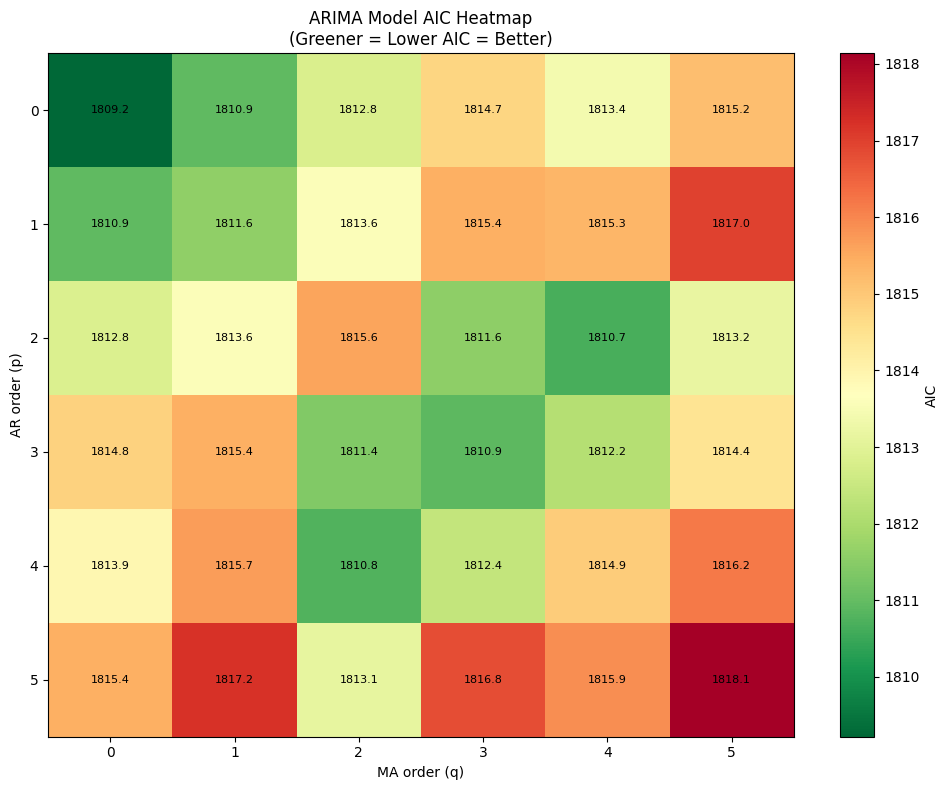

In [19]:
print("\nB7: Automatic ARIMA Selection\n")

# Grid search
print("Searching for optimal ARIMA(p,0,q) model...")
print("Search range: p in [0,5], q in [0,5]\n")

best_aic = np.inf
best_order = None
best_model = None
results = []

for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(returns_clean, order=(p, 0, q))
            fitted = model.fit()
            
            results.append({
                'p': p,
                'q': q,
                'AIC': fitted.aic,
                'BIC': fitted.bic,
                'LogLik': fitted.llf
            })
            
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = (p, 0, q)
                best_model = fitted
                
            print(f"ARIMA({p},0,{q}): AIC={fitted.aic:.4f}, BIC={fitted.bic:.4f}")
        except:
            print(f"ARIMA({p},0,{q}): Failed to converge")
            continue

# Report best model
print("\n" + "="*60)
print("Automatic Selection Results")
print("="*60)
print(f"\nBest model specification: ARIMA{best_order}")
print(f"AIC: {best_aic:.4f}")

# Top 5 models
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('AIC')
results_df['Model'] = results_df.apply(
    lambda row: f"ARIMA({int(row['p'])},0,{int(row['q'])})", axis=1
)

print("\nTop 5 Models (sorted by AIC):")
print(results_df[['Model', 'AIC', 'BIC', 'LogLik']].head().to_string(index=False))

# Detailed summary of best model
print("\n" + "="*60)
print(f"Best Model ARIMA{best_order} Detailed Summary")
print("="*60)
print(best_model.summary())

# Compare with manual identification
print("\n" + "="*60)
print("Automatic vs Manual Identification")
print("="*60)
print(f"\nManual identification (from ACF/PACF): ARIMA({p_suggest},0,{q_suggest})")
print(f"Automatic selection (by AIC): ARIMA{best_order}")

if best_order == (p_suggest, 0, q_suggest):
    print(f"\nAutomatic selection matches manual identification!")
else:
    print(f"\nResults differ. Automatic selection based on information criteria may have found a better model.")

# AIC heatmap
pivot = results_df.pivot(index='p', columns='q', values='AIC')

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(pivot.values, cmap='RdYlGn_r', aspect='auto')
ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_xticklabels(pivot.columns)
ax.set_yticklabels(pivot.index)
ax.set_xlabel('MA order (q)')
ax.set_ylabel('AR order (p)')
ax.set_title('ARIMA Model AIC Heatmap\n(Greener = Lower AIC = Better)')

for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        if not np.isnan(pivot.values[i, j]):
            ax.text(j, i, f"{pivot.values[i, j]:.1f}",
                   ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=ax, label='AIC')
plt.tight_layout()
plt.savefig('B7_aic_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### B8: ARIMA Forecasting


B8: ARIMA Forecasting

Using best model ARIMA(0, 0, 0) for forecasting

Next 20 days return forecasts:
  Day 1 (2024-05-15): 0.0015%
  Day 2 (2024-05-16): 0.0015%
  Day 3 (2024-05-17): 0.0015%
  Day 4 (2024-05-18): 0.0015%
  Day 5 (2024-05-19): 0.0015%
  ...


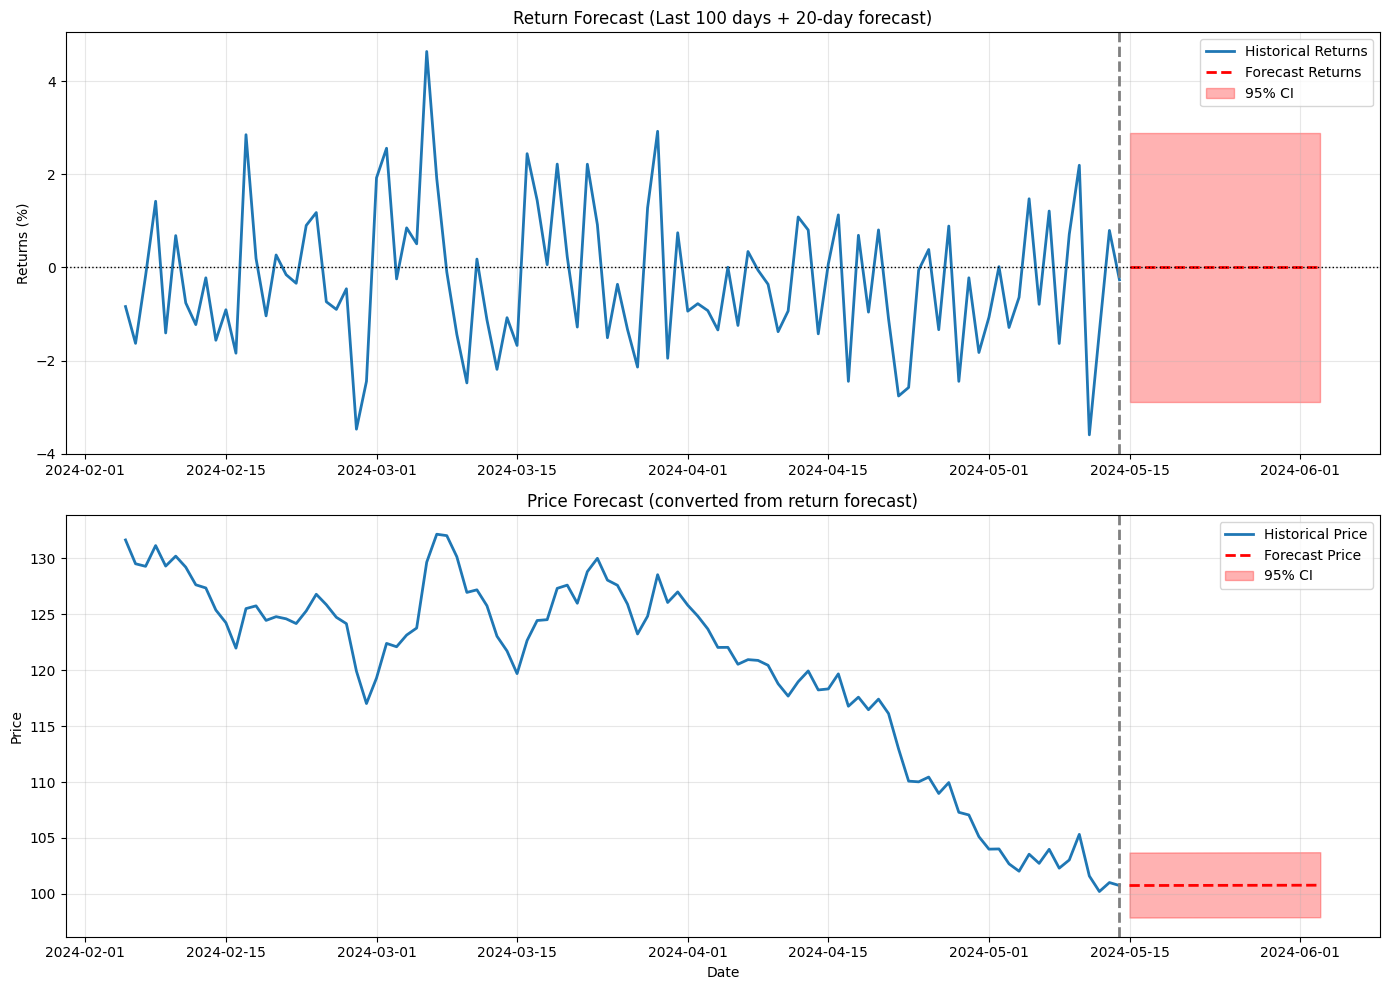


Forecast Behavior Analysis

Return forecast statistics:
  Mean: 0.001479%
  Std: 0.000000%
  Range: [0.001479%, 0.001479%]

Price forecast statistics:
  Starting price: 100.74
  Final forecast price: 100.77
  Total change: 0.03%

Return forecast convergence:
  First 10 days avg return: 0.001479%
  Last 10 days avg return: 0.001479%
  Return forecasts don't show clear convergence

Forecast uncertainty (CI width):
  Day 1: 5.7682%
  Day 10: 5.7682%
  Day 20: 5.7682%

Homework Complete!


In [20]:
print("\nB8: ARIMA Forecasting\n")

# Use best model from B7
print(f"Using best model ARIMA{best_order} for forecasting")

# Generate 20-day forecast
steps = 20
forecast_obj = best_model.get_forecast(steps=steps)
fc = forecast_obj.predicted_mean
fc_ci = forecast_obj.conf_int(alpha=0.05)  # 95% CI

print(f"\nNext {steps} days return forecasts:")
fc_dates = pd.date_range(
    df_stock.index[-1] + pd.Timedelta(days=1), 
    periods=steps, 
    freq='D'
)
for i, (date, ret) in enumerate(zip(fc_dates, fc), 1):
    if i <= 5:
        print(f"  Day {i} ({date.date()}): {ret:.4f}%")
if steps > 5:
    print(f"  ...")

# Plot return forecast
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Returns plot
last_n = 100
hist_ret = returns_clean[-last_n:]

axes[0].plot(hist_ret.index, hist_ret, label='Historical Returns', linewidth=2)
axes[0].plot(fc_dates, fc, label='Forecast Returns', linewidth=2, linestyle='--', color='red')
axes[0].fill_between(fc_dates, fc_ci.iloc[:, 0], fc_ci.iloc[:, 1],
                      alpha=0.3, color='red', label='95% CI')
axes[0].axhline(y=0, color='black', linestyle=':', linewidth=1)
axes[0].axvline(x=df_stock.index[-1], color='gray', linestyle='--', linewidth=2)
axes[0].set_title('Return Forecast (Last 100 days + 20-day forecast)')
axes[0].set_ylabel('Returns (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Convert to price forecast
last_price = df_stock['Price'].iloc[-1]
fc_prices = [last_price]

for ret in fc:
    next_p = fc_prices[-1] * np.exp(ret / 100)
    fc_prices.append(next_p)

fc_prices = np.array(fc_prices[1:])

# Price CI (approximate)
price_ci_low = []
price_ci_high = []
curr_p = last_price
for i in range(steps):
    low_ret = fc_ci.iloc[i, 0]
    high_ret = fc_ci.iloc[i, 1]
    price_ci_low.append(curr_p * np.exp(low_ret / 100))
    price_ci_high.append(curr_p * np.exp(high_ret / 100))
    curr_p = fc_prices[i]

# Price plot
hist_price = df_stock['Price'][-last_n:]

axes[1].plot(hist_price.index, hist_price, label='Historical Price', linewidth=2)
axes[1].plot(fc_dates, fc_prices, label='Forecast Price', linewidth=2, linestyle='--', color='red')
axes[1].fill_between(fc_dates, price_ci_low, price_ci_high,
                      alpha=0.3, color='red', label='95% CI')
axes[1].axvline(x=df_stock.index[-1], color='gray', linestyle='--', linewidth=2)
axes[1].set_title('Price Forecast (converted from return forecast)')
axes[1].set_ylabel('Price')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('B8_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Forecast behavior analysis
print("\n" + "="*60)
print("Forecast Behavior Analysis")
print("="*60)

print(f"\nReturn forecast statistics:")
print(f"  Mean: {fc.mean():.6f}%")
print(f"  Std: {fc.std():.6f}%")
print(f"  Range: [{fc.min():.6f}%, {fc.max():.6f}%]")

print(f"\nPrice forecast statistics:")
print(f"  Starting price: {last_price:.2f}")
print(f"  Final forecast price: {fc_prices[-1]:.2f}")
print(f"  Total change: {((fc_prices[-1] - last_price) / last_price * 100):.2f}%")

# Convergence analysis
first_half = fc[:10].mean()
second_half = fc[10:].mean()

print(f"\nReturn forecast convergence:")
print(f"  First 10 days avg return: {first_half:.6f}%")
print(f"  Last 10 days avg return: {second_half:.6f}%")
if abs(second_half) < abs(first_half):
    print(f"  Return forecasts gradually converge to zero (unconditional mean)")
else:
    print(f"  Return forecasts don't show clear convergence")

# Uncertainty analysis
ci_width = fc_ci.iloc[:, 1] - fc_ci.iloc[:, 0]
print(f"\nForecast uncertainty (CI width):")
print(f"  Day 1: {ci_width.iloc[0]:.4f}%")
print(f"  Day 10: {ci_width.iloc[9]:.4f}%")
print(f"  Day 20: {ci_width.iloc[-1]:.4f}%")

if ci_width.iloc[-1] > ci_width.iloc[0]:
    print(f"\nObservation:")
    print(f"  Confidence intervals widen as forecast horizon increases")
    print(f"  Reason: Forecast uncertainty accumulates over time")
    print(f"  Widening rate: {(ci_width.iloc[-1] / ci_width.iloc[0] - 1) * 100:.1f}%")

print("\n" + "="*60)
print("Homework Complete!")
print("="*60)